# **AUTORES**

Este codigo a sido desarrollado por:

Agustín Palacio Barrientos

Hector Alvarez Garzon

Diana Bracamonte Romero

Como ayuda para el estudio , determinación y predicción de los resultados de las pruebas Saber 11 en función de las variables socio económicas


#**LIBRERIAS NECESARIAS PARA EL CODIGO**

In [3]:
# Instalación externa
!pip install unidecode

# Librerías de análisis y manejo de datos
import pandas as pd
import numpy as np
import unidecode  # para quitar tildes

# Visualización
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Scikit-learn (preprocesamiento, modelos y métricas)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# **Abrir el dataset en Colab**



In [4]:
#Importar pandas para cargar file del proyecto como DataFrame para la limpieza y análisis exploratorio.
df = pd.read_csv('/content/Saber11_Medellin.csv', encoding='utf-8')

/tmp/ipython-input-3122748099.py:2: DtypeWarning: Columns (45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Saber11_Medellin.csv', encoding='utf-8')


# **Exploración inicial del dataset**



In [5]:
#Mostrar primeros 5 datos
df.head()

,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20172,TI,SB11201720518410,URBANO,N,A,TÉCNICO/ACADÉMICO,405001016946,405001016946,5,...,No,Si,Si,A-,44,53,54.0,44.0,54.0,253.0
1,20162,TI,SB11201620355612,URBANO,N,A,TÉCNICO,305001004811,305001004811,5,...,Si,Si,Si,B1,75,71,73.0,68.0,68.0,352.0
2,20152,CC,SB11201520202169,URBANO,N,OTRO,ACADÉMICO,305001017361,305001017361,5,...,Si,Si,Si,A1,53,52,50.0,41.0,57.0,251.0
3,20142,TI,SB11201420008354,URBANO,N,A,TÉCNICO/ACADÉMICO,105001002011,105001002011,5,...,Si,Si,Si,A1,52,52,49.0,53.0,58.0,265.0
4,20172,CC,SB11201720345835,URBANO,N,A,ACADÉMICO,305001024544,305001024544,5,...,Si,Si,Si,A-,46,35,40.0,37.0,40.0,193.0


In [6]:
#Mostrar últimos 5 datos
df.tail()

,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
450737,20221,TI,AC202210027924,RURAL,N,B,ACADÉMICO,305001000077,305001000077,5,...,Si,Si,Si,B1,78.0,42,59.0,45.0,59.0,267.0
450738,20221,CC,AC202210003792,URBANO,NaN,A,TÉCNICO/ACADÉMICO,305001022461,305001022461,5,...,No,NaN,No,A1,56.0,47,50.0,40.0,53.0,241.0
450739,20221,TI,AC202210015479,URBANO,N,A,ACADÉMICO,305001017361,305001017361,5,...,Si,Si,Si,A-,30.0,43,37.0,35.0,43.0,194.0
450740,20221,CC,AC202210032143,URBANO,N,OTRO,ACADÉMICO,305001025193,305001025193,5,...,Si,Si,Si,A1,49.0,51,52.0,54.0,60.0,269.0
450741,20221,CC,AC202210023501,URBANO,N,OTRO,ACADÉMICO,305001022682,305001022682,5,...,Si,Si,Si,A-,42.0,50,45.0,40.0,52.0,232.0


In [7]:
#Filas y columnas del dataset
df.shape

#Nombre columnas, #valores nulos y tipo de datos por columna
df.info()

#Resumen estadístico del dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450742 entries, 0 to 450741
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PERIODO                        450742 non-null  int64  
 1   ESTU_TIPODOCUMENTO             450742 non-null  object 
 2   ESTU_CONSECUTIVO               450742 non-null  object 
 3   COLE_AREA_UBICACION            450742 non-null  object 
 4   COLE_BILINGUE                  410351 non-null  object 
 5   COLE_CALENDARIO                450513 non-null  object 
 6   COLE_CARACTER                  444009 non-null  object 
 7   COLE_COD_DANE_ESTABLECIMIENTO  450742 non-null  int64  
 8   COLE_COD_DANE_SEDE             450742 non-null  int64  
 9   COLE_COD_DEPTO_UBICACION       450742 non-null  int64  
 10  COLE_COD_MCPIO_UBICACION       450742 non-null  int64  
 11  COLE_CODIGO_ICFES              449562 non-null  float64
 12  COLE_DEPTO_UBICACION          

,PERIODO,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_CODIGO_ICFES,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
count,450742.000000,4.507420e+05,4.507420e+05,450742.0,450742.0,449562.000000,450742.000000,450742.000000,448183.000000,448183.000000,234134.000000,234134.000000,234134.000000,234134.000000
mean,20149.691287,1.926713e+11,1.925916e+11,5.0,5001.0,148465.379625,5.048626,5069.239425,5.070833,5082.731117,49.613055,49.511698,53.232290,253.824532
std,40.419395,1.019565e+11,1.019132e+11,0.0,0.0,210520.263598,1.730572,1745.154113,2.092667,2105.068844,11.735448,10.798895,10.444421,50.901126
min,20101.000000,1.050010e+10,1.050010e+10,5.0,5001.0,18.000000,5.000000,5001.000000,5.000000,5001.000000,0.000000,0.000000,0.000000,0.000000
25%,20112.000000,1.050010e+11,1.050010e+11,5.0,5001.0,28290.000000,5.000000,5001.000000,5.000000,5001.000000,41.000000,42.000000,46.000000,216.000000
50%,20142.000000,1.050010e+11,1.050010e+11,5.0,5001.0,95802.000000,5.000000,5001.000000,5.000000,5001.000000,50.000000,49.000000,53.000000,251.000000
75%,20194.000000,3.050010e+11,3.050010e+11,5.0,5001.0,137067.000000,5.000000,5001.000000,5.000000,5001.000000,58.000000,57.000000,61.000000,289.000000
max,20224.000000,4.050010e+11,4.050010e+11,5.0,5001.0,804344.000000,91.000000,91001.000000,91.000000,91798.000000,100.000000,100.000000,100.000000,475.000000


# **Limpieza del Dataset:** Eliminación de duplicados, corrección de tipo de datos y reemplazo de nulls, corrección de la columna PERIODO a años, reemplazo en opciones de columnas categóricas, inclusión de columnas de nivel de desempeño.

In [8]:
#Conteo de valores nulos por columna
df.isnull().sum()

,0
PERIODO,0
ESTU_TIPODOCUMENTO,0
ESTU_CONSECUTIVO,0
COLE_AREA_UBICACION,0
COLE_BILINGUE,40391
COLE_CALENDARIO,229
COLE_CARACTER,6733
COLE_COD_DANE_ESTABLECIMIENTO,0
COLE_COD_DANE_SEDE,0
COLE_COD_DEPTO_UBICACION,0


In [9]:
# Eliminar filas si hay un Null en la columna PUNT_GLOBAL
df.dropna(subset=['PUNT_GLOBAL'],inplace=True)
print("\nDataFrame después de df.dropna(subset=['PUNT_GLOBAL'])")

#Guardar en el nuevo archivo
df.to_csv('Saber11_modificado.csv', index=False)

# Cargar el archivo modificado para seguir trabajando con él
df_nuevo = pd.read_csv('Saber11_modificado.csv')

print(df_nuevo.head())


DataFrame después de df.dropna(subset=['PUNT_GLOBAL'])
   PERIODO ESTU_TIPODOCUMENTO  ESTU_CONSECUTIVO COLE_AREA_UBICACION  \
0    20172                 TI  SB11201720518410              URBANO   
1    20162                 TI  SB11201620355612              URBANO   
2    20152                 CC  SB11201520202169              URBANO   
3    20142                 TI  SB11201420008354              URBANO   
4    20172                 CC  SB11201720345835              URBANO   

  COLE_BILINGUE COLE_CALENDARIO      COLE_CARACTER  \
0             N               A  TÉCNICO/ACADÉMICO   
1             N               A            TÉCNICO   
2             N            OTRO          ACADÉMICO   
3             N               A  TÉCNICO/ACADÉMICO   
4             N               A          ACADÉMICO   

   COLE_COD_DANE_ESTABLECIMIENTO  COLE_COD_DANE_SEDE  \
0                   405001016946        405001016946   
1                   305001004811        305001004811   
2                   3050

In [10]:
#Eliminar columnas duplicadas exactas en todas su columnas y guardar en el nuevo dataset

df_nuevo.drop_duplicates(inplace=True)

df_nuevo.shape

(177620, 51)

In [11]:
# Lista de las columnas a eliminar del Dataset nuevo Saber11_modificado.csv
columnas_a_eliminar = ['ESTU_TIPODOCUMENTO', 'COLE_COD_DANE_ESTABLECIMIENTO','COLE_COD_DANE_SEDE',
'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION','COLE_COD_MCPIO_UBICACION', 'COLE_CODIGO_ICFES', 'COLE_NOMBRE_ESTABLECIMIENTO',
'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_COD_MCPIO_PRESENTACION','ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_DEPTO_PRESENTACION', 'ESTU_FECHANACIMIENTO',
'ESTU_ESTADOINVESTIGACION', 'ESTU_MCPIO_PRESENTACION','ESTU_PAIS_RESIDE']

# Elimina las columnas del DataFrame
# axis=1 indica que estamos eliminando columnas (0 sería para filas)
# inplace=True modifica el DataFrame original, no crea una copia
df_nuevo.drop(columns=columnas_a_eliminar, inplace=True)

# También puedes usar la sintaxis con axis=1
# df.drop(columnas_a_eliminar, axis=1, inplace=True)

print("\nDataFrame después de eliminar las columnas:")
print(df_nuevo.head())


DataFrame después de eliminar las columnas:
   PERIODO  ESTU_CONSECUTIVO COLE_AREA_UBICACION COLE_BILINGUE  \
0    20172  SB11201720518410              URBANO             N   
1    20162  SB11201620355612              URBANO             N   
2    20152  SB11201520202169              URBANO             N   
3    20142  SB11201420008354              URBANO             N   
4    20172  SB11201720345835              URBANO             N   

  COLE_CALENDARIO      COLE_CARACTER COLE_GENERO COLE_JORNADA  \
0               A  TÉCNICO/ACADÉMICO       MIXTO     SABATINA   
1               A            TÉCNICO       MIXTO     COMPLETA   
2            OTRO          ACADÉMICO       MIXTO        TARDE   
3               A  TÉCNICO/ACADÉMICO       MIXTO       MAÑANA   
4               A          ACADÉMICO       MIXTO     SABATINA   

  COLE_MCPIO_UBICACION COLE_NATURALEZA  ... FAMI_TIENECOMPUTADOR  \
0             MEDELLIN      NO OFICIAL  ...                   No   
1             MEDELLIN      NO 

In [12]:
#Cambiar tipo de dato de object a float o datetime para las columnas PUNT_INGLES, PUNT_MATEMATICAS.

df_nuevo['PUNT_INGLES'] = df_nuevo['PUNT_INGLES'].astype(float)
df_nuevo['PUNT_MATEMATICAS'] = df_nuevo['PUNT_MATEMATICAS'].astype(float)

#Carateristicas del nuevo Dataset df_nuevo
df_nuevo.shape
df_nuevo.info()
df_nuevo.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 177620 entries, 0 to 234133
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PERIODO                   177620 non-null  int64  
 1   ESTU_CONSECUTIVO          177620 non-null  object 
 2   COLE_AREA_UBICACION       177620 non-null  object 
 3   COLE_BILINGUE             158353 non-null  object 
 4   COLE_CALENDARIO           177620 non-null  object 
 5   COLE_CARACTER             174281 non-null  object 
 6   COLE_GENERO               177620 non-null  object 
 7   COLE_JORNADA              177620 non-null  object 
 8   COLE_MCPIO_UBICACION      177620 non-null  object 
 9   COLE_NATURALEZA           177620 non-null  object 
 10  COLE_NOMBRE_SEDE          177620 non-null  object 
 11  COLE_SEDE_PRINCIPAL       177620 non-null  object 
 12  ESTU_DEPTO_RESIDE         177596 non-null  object 
 13  ESTU_ESTUDIANTE           177620 non-null  object

,PERIODO,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
count,177620.000000,177613.000000,177620.000000,177620.000000,177620.000000,177620.000000,177620.000000
mean,20173.733572,51.499783,50.633256,50.158468,49.935812,53.125391,255.023590
std,27.340369,13.085458,12.083001,11.538437,10.756588,10.355911,50.382056
min,20142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20152.000000,43.000000,42.000000,42.000000,42.000000,46.000000,217.000000
50%,20162.000000,49.000000,50.000000,50.000000,50.000000,53.000000,252.000000
75%,20194.000000,58.000000,59.000000,59.000000,57.000000,60.000000,290.000000
max,20224.000000,100.000000,100.000000,100.000000,100.000000,100.000000,475.000000


In [13]:
#Eliminar el último caracter de la columna PERIODO para que se un parametro de años

# Convertir la columna 'PERIODO' a tipo string (str)
df_nuevo['PERIODO'] = df_nuevo['PERIODO'].astype(str)

# Eliminar el último número de cada valor en la columna
# Ahora que es un string, podemos usar el método .str.slice()
df_nuevo['PERIODO'] = df_nuevo['PERIODO'].str.slice(stop=-1)

# Volver a convertir la columna a tipo integer (int)
df_nuevo['PERIODO'] = df_nuevo['PERIODO'].astype(int)

# Mostrar el DataFrame modificado y su tipo de dato final
print("\nDataFrame modificado y su tipo de dato final:")
print(df_nuevo)
print(df_nuevo.dtypes)


DataFrame modificado y su tipo de dato final:
        PERIODO  ESTU_CONSECUTIVO COLE_AREA_UBICACION COLE_BILINGUE  \
0          2017  SB11201720518410              URBANO             N   
1          2016  SB11201620355612              URBANO             N   
2          2015  SB11201520202169              URBANO             N   
3          2014  SB11201420008354              URBANO             N   
4          2017  SB11201720345835              URBANO             N   
...         ...               ...                 ...           ...   
234129     2022    AC202210027924               RURAL             N   
234130     2022    AC202210003792              URBANO           NaN   
234131     2022    AC202210015479              URBANO             N   
234132     2022    AC202210032143              URBANO             N   
234133     2022    AC202210023501              URBANO             N   

       COLE_CALENDARIO      COLE_CARACTER COLE_GENERO COLE_JORNADA  \
0                    A  TÉCNIC

In [14]:
#Reemplazar los nulos de las siguientes columnas con su media (en caso de ser númericos) o con la moda (en caso de ser categóricas):

#Definición de arreglo con las columnas que deben ser rellendas con la moda.
columnas_rellenar_moda = ['COLE_BILINGUE', 'COLE_CARACTER', 'ESTU_DEPTO_RESIDE', 'ESTU_GENERO', 'ESTU_MCPIO_RESIDE',
'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL',
'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'DESEMP_INGLES']

#Relleno de nulls con la moda
for columna in columnas_rellenar_moda:
    df_nuevo[columna].fillna(df_nuevo[columna].mode()[0], inplace=True)

#Relleno de nulls con la media para la columna PUNT_INGLES (solo 7 filas a rellenar) 177621 non-null
df_nuevo['PUNT_INGLES'].fillna(df_nuevo['PUNT_INGLES'].mean(), inplace=True)

df_nuevo.info()

/tmp/ipython-input-2645488631.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nuevo[columna].fillna(df_nuevo[columna].mode()[0], inplace=True)
/tmp/ipython-input-2645488631.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

<class 'pandas.core.frame.DataFrame'>
Index: 177620 entries, 0 to 234133
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PERIODO                   177620 non-null  int64  
 1   ESTU_CONSECUTIVO          177620 non-null  object 
 2   COLE_AREA_UBICACION       177620 non-null  object 
 3   COLE_BILINGUE             177620 non-null  object 
 4   COLE_CALENDARIO           177620 non-null  object 
 5   COLE_CARACTER             177620 non-null  object 
 6   COLE_GENERO               177620 non-null  object 
 7   COLE_JORNADA              177620 non-null  object 
 8   COLE_MCPIO_UBICACION      177620 non-null  object 
 9   COLE_NATURALEZA           177620 non-null  object 
 10  COLE_NOMBRE_SEDE          177620 non-null  object 
 11  COLE_SEDE_PRINCIPAL       177620 non-null  object 
 12  ESTU_DEPTO_RESIDE         177620 non-null  object 
 13  ESTU_ESTUDIANTE           177620 non-null  object

In [15]:
#Identificar opciones en cada columna categórica para saber si se debe hacer organización de las opciones para visualización correcta por opciones.

# Primero, obtenemos la lista de columnas categóricas.
columnas_categoricas = df_nuevo.select_dtypes(include=['object', 'category']).columns.tolist()

# Iterar sobre cada columna categórica y mostrar sus valores únicos
for columna in columnas_categoricas:
    print(f"\n--- Analizando la columna: '{columna}' ---")

# Mostrar los valores únicos y su conteo (más informativo)
    print(f"Distribución de valores:")
    print(df_nuevo[columna].value_counts())

# Un pequeño separador para la siguiente columna
print("-" * 30)


--- Analizando la columna: 'ESTU_CONSECUTIVO' ---
Distribución de valores:
ESTU_CONSECUTIVO
AC202210023501      1
SB11201720518410    1
SB11201620355612    1
SB11201520202169    1
AC202210016950      1
                   ..
SB11201420467729    1
SB11201420014037    1
SB11201520469362    1
SB11201620024857    1
SB11201720345835    1
Name: count, Length: 177620, dtype: int64

--- Analizando la columna: 'COLE_AREA_UBICACION' ---
Distribución de valores:
COLE_AREA_UBICACION
URBANO    172657
RURAL       4963
Name: count, dtype: int64

--- Analizando la columna: 'COLE_BILINGUE' ---
Distribución de valores:
COLE_BILINGUE
N    177197
S       423
Name: count, dtype: int64

--- Analizando la columna: 'COLE_CALENDARIO' ---
Distribución de valores:
COLE_CALENDARIO
A       168721
OTRO      7293
B         1606
Name: count, dtype: int64

--- Analizando la columna: 'COLE_CARACTER' ---
Distribución de valores:
COLE_CARACTER
ACADÉMICO            96278
TÉCNICO/ACADÉMICO    79031
TÉCNICO               21

In [16]:
#Modificación de opciones de categorías para creación de visualizaciones informativas correctas.

#Columnas a reemplazar información
columnas_reemplazo = ['COLE_BILINGUE', 'COLE_MCPIO_UBICACION', 'COLE_SEDE_PRINCIPAL', 'ESTU_PRIVADO_LIBERTAD',
'FAMI_CUARTOSHOGAR', 'FAMI_ESTRATOVIVIENDA','ESTU_GENERO','FAMI_EDUCACIONMADRE','FAMI_EDUCACIONPADRE','FAMI_ESTRATOVIVIENDA']

#Definir el diccionario de mapeo para reemplazar información en las columnas
mapeo_reemplazo = {
    'S': 'Si',
    'N': 'No',
    'MEDELLÍN': 'MEDELLIN',
    'Seis': 'Seis o mas',
    'Siete': 'Seis o mas',
    'Ocho': 'Seis o mas',
    'Nueve': 'Seis o mas',
    'Diez o más': 'Seis o mas',
    'Estrato 1': '1',
    'Estrato 2':'2',
    'Estrato 3':'3',
    'Estrato 4':'4',
    'Estrato 5':'5',
    'Estrato 6':'6',
    'Sin Estrato':'',
    'F': 'Femenino',
    'M': 'Masculino',
    'Ninguno': 'No Aplica',
    'No sabe': 'No Aplica'
}

#Sentencia para reemplazar en la columnas haciendo uso del diccionario.
for columna in columnas_reemplazo:
    df_nuevo[columna].replace(mapeo_reemplazo, inplace=True)

#Rellenado de null en la columna FAMI_ESTRATOVIVIENDA con la moda.
df_nuevo['FAMI_ESTRATOVIVIENDA'].replace('',df_nuevo['FAMI_ESTRATOVIVIENDA'].mode()[0], inplace=True)

#Verificar el cambio mostrando los valores únicos, se hace prueba con la última columna.
print("Nuevos valores únicos en la columna FAMI_ESTRATOVIVIENDA:")
print(df_nuevo['FAMI_ESTRATOVIVIENDA'].unique())

# Reemplazo en la columna FAMI_PERSONASHOGAR para unificar opciones.
mapeo_reemplazo1 = {
    'Una': '1 a 2',
    'Dos': '1 a 2',
    'Tres': '3 a 4',
    'Cuatro': '3 a 4',
    'Cinco': '5 a 6',
    'Seis': '5 a 6',
    'Siete': '7 a 8',
    'Ocho': '7 a 8',
    'Nueve': '9 o más',
    'Diez': '9 o más',
    'Once': '9 o más',
    'Doce o más': '9 o más'
}
df_nuevo['FAMI_PERSONASHOGAR'].replace(mapeo_reemplazo1, inplace=True)
print("Nuevos valores únicos en la columna FAMI_PERSONASHOGAR:")
print(df_nuevo['FAMI_PERSONASHOGAR'].unique())

/tmp/ipython-input-2815919439.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nuevo[columna].replace(mapeo_reemplazo, inplace=True)


Nuevos valores únicos en la columna FAMI_ESTRATOVIVIENDA:
['2' '3' '1' '4' '5' '6']
Nuevos valores únicos en la columna FAMI_PERSONASHOGAR:
['5 a 6' '3 a 4' '1 a 2' '9 o más' '7 a 8']


In [17]:
# Identificar el número de filas duplicadas basándote en las columnas 'ESTU_CONSECUTIVO','PERIODO', y 'PUNT_GLOBAL'
# El método duplicated() por defecto marca todas las filas duplicadas excepto la primera.
# sum() cuenta cuántos True hay en la serie booleana.
num_duplicados = df_nuevo.duplicated(subset=['ESTU_CONSECUTIVO','PERIODO', 'PUNT_GLOBAL']).sum()

print(f"\nNúmero de filas duplicadas: {num_duplicados}")

# Ver las filas que son duplicadas
# Si quieres ver las filas completas que pandas considera duplicadas, puedes usar el resultado del método duplicated() para filtrar el DataFrame.
filas_duplicadas = df_nuevo[df_nuevo.duplicated(subset=['ESTU_CONSECUTIVO','PERIODO', 'PUNT_GLOBAL'])]

print("\nFilas duplicadas encontradas:")
print(filas_duplicadas)


Número de filas duplicadas: 0

Filas duplicadas encontradas:
Empty DataFrame
Columns: [PERIODO, ESTU_CONSECUTIVO, COLE_AREA_UBICACION, COLE_BILINGUE, COLE_CALENDARIO, COLE_CARACTER, COLE_GENERO, COLE_JORNADA, COLE_MCPIO_UBICACION, COLE_NATURALEZA, COLE_NOMBRE_SEDE, COLE_SEDE_PRINCIPAL, ESTU_DEPTO_RESIDE, ESTU_ESTUDIANTE, ESTU_GENERO, ESTU_MCPIO_RESIDE, ESTU_NACIONALIDAD, ESTU_PRIVADO_LIBERTAD, FAMI_CUARTOSHOGAR, FAMI_EDUCACIONMADRE, FAMI_EDUCACIONPADRE, FAMI_ESTRATOVIVIENDA, FAMI_PERSONASHOGAR, FAMI_TIENEAUTOMOVIL, FAMI_TIENECOMPUTADOR, FAMI_TIENEINTERNET, FAMI_TIENELAVADORA, DESEMP_INGLES, PUNT_INGLES, PUNT_MATEMATICAS, PUNT_SOCIALES_CIUDADANAS, PUNT_C_NATURALES, PUNT_LECTURA_CRITICA, PUNT_GLOBAL]
Index: []

[0 rows x 34 columns]


# **Inclusión de columnas de nivel de desempeño y reemplazo del valor de la coulmna PUNT_GLOBAL por la suma de los puntajes de cada sección del examen**

In [18]:
#Incluir columnas por nivel para cada puntaje para visualización

#Definir los límites de los rangos (bins) y las etiquetas (labels)
rango_nivel = [0, 35, 50, 70, 100]
nivel = [1, 2, 3, 4]

#Definir las dos listas en el orden correcto
#Lista de las columnas originales a segmentar
columnas_a_segmentar = ['PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA']

#Lista de los nombres exactos para las nuevas columnas
nombres_nuevas_columnas = ['Matematicas_Nivel', 'Sociales_Nivel', 'Ciencias_Nivel', 'Lectura_Nivel']

#Usar un bucle for con zip() para iterar sobre ambas listas.
for columna_original, nueva_columna in zip(columnas_a_segmentar, nombres_nuevas_columnas):
    # Aplicar pd.cut() usando la columna original y el nuevo nombre
    df_nuevo[nueva_columna] = pd.cut(
        x = df_nuevo[columna_original],
        bins = rango_nivel,
        labels = nivel,
        right = True,
        include_lowest = True
    )

# Crear una lista de las columnas a sumar.
columnas_a_sumar = ['PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA']

# Reemplazar la columna 'PUNT_GLOBAL' con la suma de los puntajes por sección de la prueba.
df_nuevo['PUNT_GLOBAL'] = df_nuevo[columnas_a_sumar].sum(axis=1)

#Cambiar el nombre de columna DESEMP_INGLES y modificar tipo de dato a category como los otros niveles.
df_nuevo = df_nuevo.rename(columns={'DESEMP_INGLES': 'Ingles_Nivel'}).astype({'Ingles_Nivel': 'category'})

In [19]:
#Añadir la columna para saber en que categoría quedó
# Definir condiciones

condiciones = [
    df_nuevo['PUNT_GLOBAL'] <= 256.1,
    (df_nuevo['PUNT_GLOBAL'] > 256.1) & (df_nuevo['PUNT_GLOBAL'] <= 349),
    df_nuevo['PUNT_GLOBAL'] > 349
]

# Definir valores correspondientes
valores = [
    'MENOR AL PUNT NACIONAL',
    'SUPERIOR AL PUNT NACIONAL',
    'BECA GENERACIÓN E'
]

# Crear la nueva columna asegurando dtype object
df_nuevo['CLASIFICACIÓN'] = np.select(
    condiciones,
    valores,
    default='SIN CLASIFICAR'
).astype(object)

# Verificar
print(df_nuevo[['PUNT_GLOBAL', 'CLASIFICACIÓN']].head())

   PUNT_GLOBAL              CLASIFICACIÓN
0        249.0     MENOR AL PUNT NACIONAL
1        355.0          BECA GENERACIÓN E
2        253.0     MENOR AL PUNT NACIONAL
3        264.0  SUPERIOR AL PUNT NACIONAL
4        198.0     MENOR AL PUNT NACIONAL


In [20]:
#Ver detalles de la table posterior al reemplazo de Nulls
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177620 entries, 0 to 234133
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   PERIODO                   177620 non-null  int64   
 1   ESTU_CONSECUTIVO          177620 non-null  object  
 2   COLE_AREA_UBICACION       177620 non-null  object  
 3   COLE_BILINGUE             177620 non-null  object  
 4   COLE_CALENDARIO           177620 non-null  object  
 5   COLE_CARACTER             177620 non-null  object  
 6   COLE_GENERO               177620 non-null  object  
 7   COLE_JORNADA              177620 non-null  object  
 8   COLE_MCPIO_UBICACION      177620 non-null  object  
 9   COLE_NATURALEZA           177620 non-null  object  
 10  COLE_NOMBRE_SEDE          177620 non-null  object  
 11  COLE_SEDE_PRINCIPAL       177620 non-null  object  
 12  ESTU_DEPTO_RESIDE         177620 non-null  object  
 13  ESTU_ESTUDIANTE           177620 n

In [21]:
#Guardar cambios en el file
df_nuevo.to_csv('Saber11_modificado.csv', index=False)

In [22]:
# Descarga el archivo a tu computadora (opcional)
# from google.colab import files
# files.download('Saber11_modificado.csv')

# **EDA más profundo y visualizaciones**


In [23]:
# Ver valores únicos de la columna PERIODO
valores_unicos = sorted(df_nuevo['PERIODO'].unique())
print(valores_unicos)

[np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]


VER LA CANTIDAD DE ESTUDIANTES QUE PRESENTARON EL EXAMEN POR AÑO

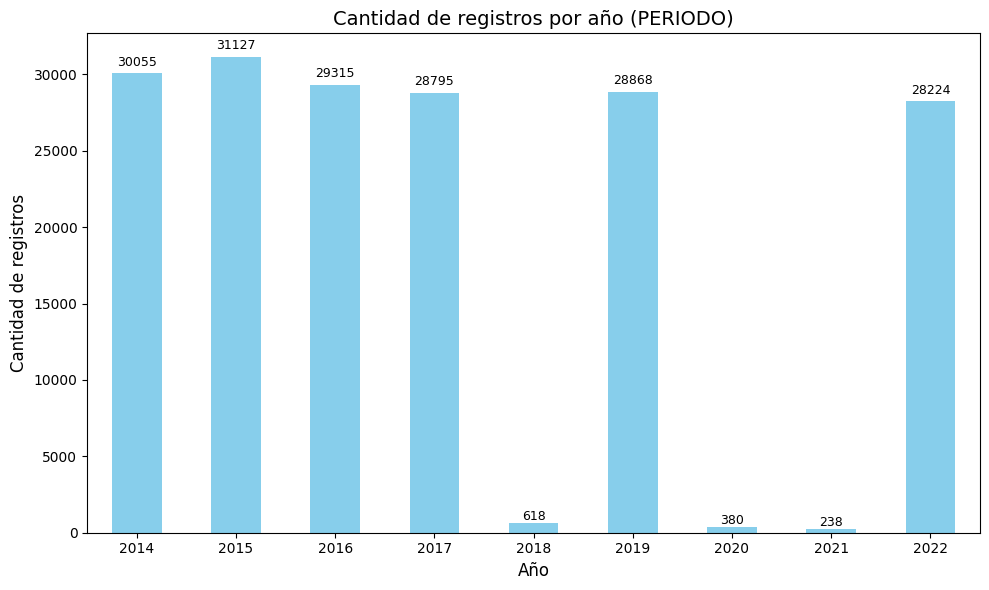

In [24]:
# Contar registros por año
conteo_por_anio = df_nuevo['PERIODO'].value_counts().sort_index()

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
bars = conteo_por_anio.plot(kind='bar', color='skyblue', ax=ax)

# Personalizar
plt.title('Cantidad de registros por año (PERIODO)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de registros', fontsize=12)
plt.xticks(rotation=0)

# Añadir valores encima de cada barra
for i, valor in enumerate(conteo_por_anio.values):
    ax.text(i, valor + (valor * 0.01), str(int(valor)),
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


VER LA CANTIDAD EN % DE ESTUDIANTES URBANOS Y RURALES

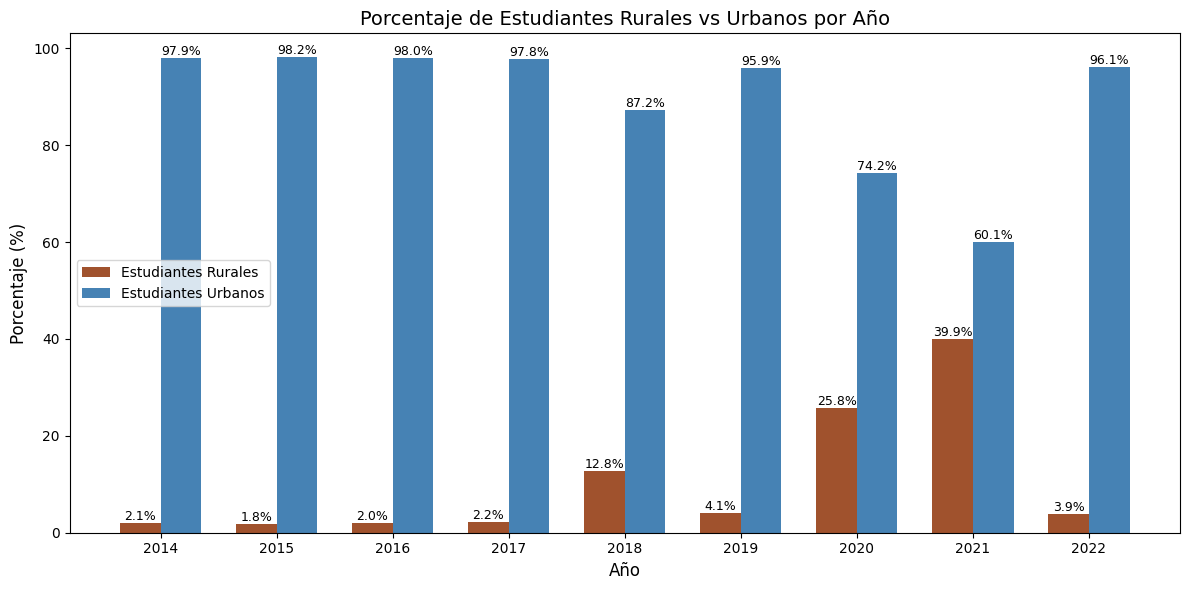

In [25]:
# Filtrar solo los años 2010 a 2022
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2010, 2022)]

# Agrupar por año y tipo de ubicación contando estudiantes
df_grouped = df_filtrado.groupby(['PERIODO', 'COLE_AREA_UBICACION']).size().reset_index(name='Cantidad')

# Pivotear para tener columnas separadas para RURAL y URBANO
df_final = df_grouped.pivot(index='PERIODO', columns='COLE_AREA_UBICACION', values='Cantidad').fillna(0)

# Renombrar columnas
df_final = df_final.rename(columns={'RURAL': 'EST_RURAL', 'URBANO': 'EST_URB'})

# Asegurar que estén todas las columnas
for col in ['EST_RURAL', 'EST_URB']:
    if col not in df_final.columns:
        df_final[col] = 0

# Calcular porcentajes sobre el total de cada año
df_final['TOTAL'] = df_final['EST_RURAL'] + df_final['EST_URB']
df_final['PORC_RURAL'] = (df_final['EST_RURAL'] / df_final['TOTAL']) * 100
df_final['PORC_URB'] = (df_final['EST_URB'] / df_final['TOTAL']) * 100

# Resetear índice para que PERIODO sea columna
df_final = df_final.reset_index()

# Crear gráfico de barras lado a lado con porcentajes
x = np.arange(len(df_final['PERIODO']))  # posiciones en eje X
width = 0.35  # ancho de cada barra

fig, ax = plt.subplots(figsize=(12, 6))
b1 = ax.bar(x - width/2, df_final['PORC_RURAL'], width, label='Estudiantes Rurales', color='sienna')
b2 = ax.bar(x + width/2, df_final['PORC_URB'], width, label='Estudiantes Urbanos', color='steelblue')

# Personalización
ax.set_title('Porcentaje de Estudiantes Rurales vs Urbanos por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df_final['PERIODO'])
ax.legend()

# Mostrar etiquetas de valor encima de cada barra
for bars in [b1, b2]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f"{bar.get_height():.1f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

ENCONTREMOS LA CANTIDAD DE COLEGIOS BILINGUE O NO

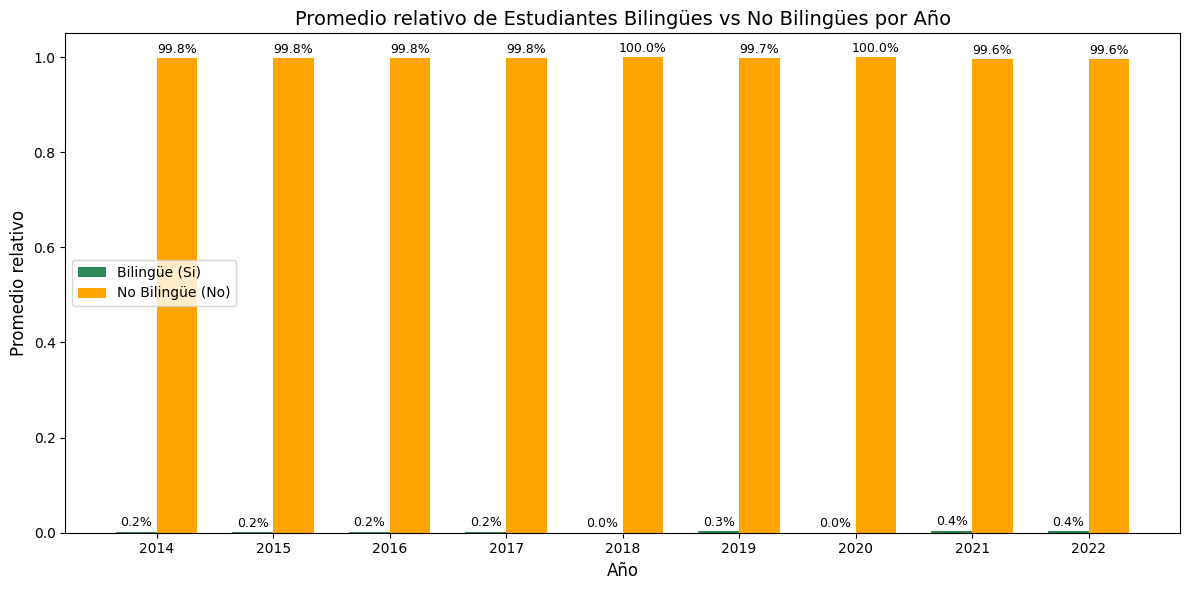

In [26]:
# Filtrar solo los años 2014 a 2022
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()

# Contar estudiantes por año y tipo de colegio
df_grouped = df_filtrado.groupby(['PERIODO', 'COLE_BILINGUE']).size().reset_index(name='Cantidad')

# Calcular el total de estudiantes por año
totales_anio = df_grouped.groupby('PERIODO')['Cantidad'].sum().reset_index(name='Total_Anio')

# Unir para poder calcular el promedio relativo al año
df_grouped = df_grouped.merge(totales_anio, on='PERIODO')

# Calcular promedio por año (Cantidad / Total_Anio)
df_grouped['Promedio'] = df_grouped['Cantidad'] / df_grouped['Total_Anio']

# Pivotear para tener columnas separadas para Si y No
df_final = df_grouped.pivot(index='PERIODO', columns='COLE_BILINGUE', values='Promedio').fillna(0)

# Renombrar columnas
df_final = df_final.rename(columns={'Si': 'PROM_BILINGUE_Si', 'No': 'PROM_BILINGUE_No'})

# Asegurar que estén todas las columnas
for col in ['PROM_BILINGUE_Si', 'PROM_BILINGUE_No']:
    if col not in df_final.columns:
        df_final[col] = 0

# Mantener todos los años 2014-2022 en orden
años = list(range(2014, 2023))
df_final = df_final.reindex(años, fill_value=0).reset_index().rename(columns={'index': 'PERIODO'})

# Crear gráfico de barras lado a lado
x = np.arange(len(df_final['PERIODO']))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
b1 = ax.bar(x - width/2, df_final['PROM_BILINGUE_Si'], width, label='Bilingüe (Si)', color='seagreen')
b2 = ax.bar(x + width/2, df_final['PROM_BILINGUE_No'], width, label='No Bilingüe (No)', color='orange')

# Personalización
ax.set_title('Promedio relativo de Estudiantes Bilingües vs No Bilingües por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Promedio relativo', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df_final['PERIODO'])
ax.legend()

# Mostrar etiquetas encima de cada barra como porcentaje
for bars in [b1, b2]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.005,
                f"{bar.get_height()*100:.1f}%",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



Cantidad de estudiantes por tipo de calendario

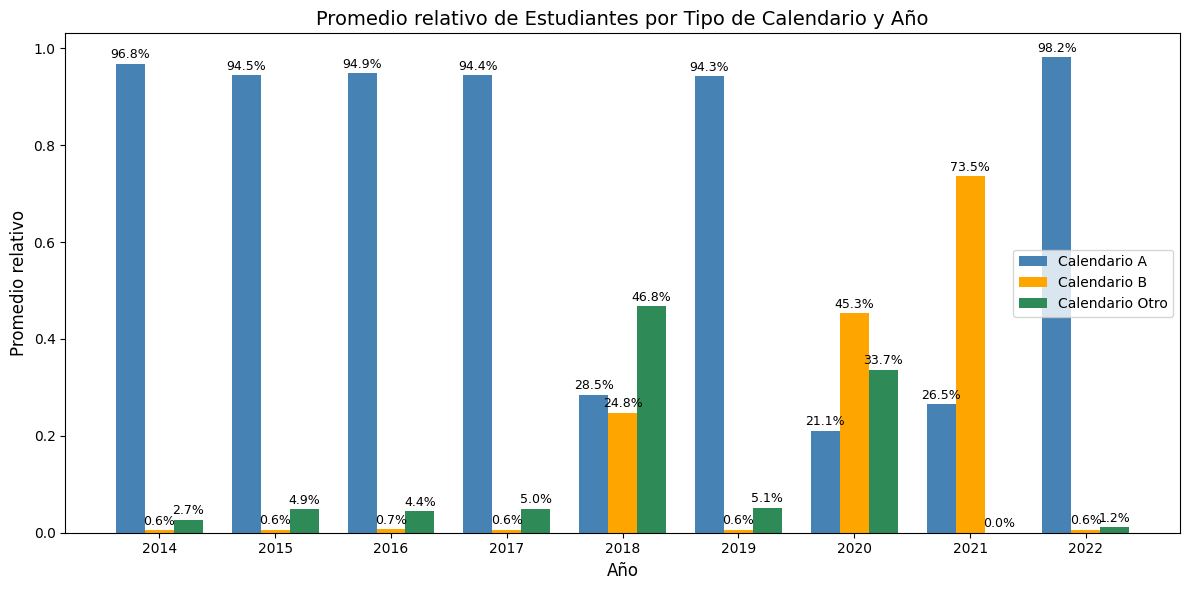

In [27]:
# Filtrar solo los años 2014 a 2022
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()

# Contar estudiantes por año y tipo de calendario
df_grouped = df_filtrado.groupby(['PERIODO', 'COLE_CALENDARIO']).size().reset_index(name='Cantidad')

# Calcular el total de estudiantes por año
totales_anio = df_grouped.groupby('PERIODO')['Cantidad'].sum().reset_index(name='Total_Anio')

# Unir para poder calcular el promedio relativo al año
df_grouped = df_grouped.merge(totales_anio, on='PERIODO')

# Calcular promedio por año (Cantidad / Total_Anio)
df_grouped['Promedio'] = df_grouped['Cantidad'] / df_grouped['Total_Anio']

# Pivotear para tener columnas separadas para A, B y OTRO
df_final = df_grouped.pivot(index='PERIODO', columns='COLE_CALENDARIO', values='Promedio').fillna(0)

# Renombrar columnas
df_final = df_final.rename(columns={'A': 'CAL_A', 'B': 'CAL_B', 'OTRO': 'CAL_OTRO'})

# Asegurar que estén todas las columnas
for col in ['CAL_A', 'CAL_B', 'CAL_OTRO']:
    if col not in df_final.columns:
        df_final[col] = 0

# Mantener todos los años 2014-2022 en orden
años = list(range(2014, 2023))
df_final = df_final.reindex(años, fill_value=0).reset_index().rename(columns={'index': 'PERIODO'})

# Crear gráfico de barras lado a lado
x = np.arange(len(df_final['PERIODO']))
width = 0.25  # ancho de cada barra (tres categorías → más angosto)

fig, ax = plt.subplots(figsize=(12, 6))
b1 = ax.bar(x - width, df_final['CAL_A'], width, label='Calendario A', color='steelblue')
b2 = ax.bar(x, df_final['CAL_B'], width, label='Calendario B', color='orange')
b3 = ax.bar(x + width, df_final['CAL_OTRO'], width, label='Calendario Otro', color='seagreen')

# Personalización
ax.set_title('Promedio relativo de Estudiantes por Tipo de Calendario y Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Promedio relativo', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df_final['PERIODO'])
ax.legend()

# Mostrar etiquetas encima de cada barra como porcentaje
for bars in [b1, b2, b3]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.005,
                f"{bar.get_height()*100:.1f}%",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



SEGUN EL TIPO DE INSTITUCION

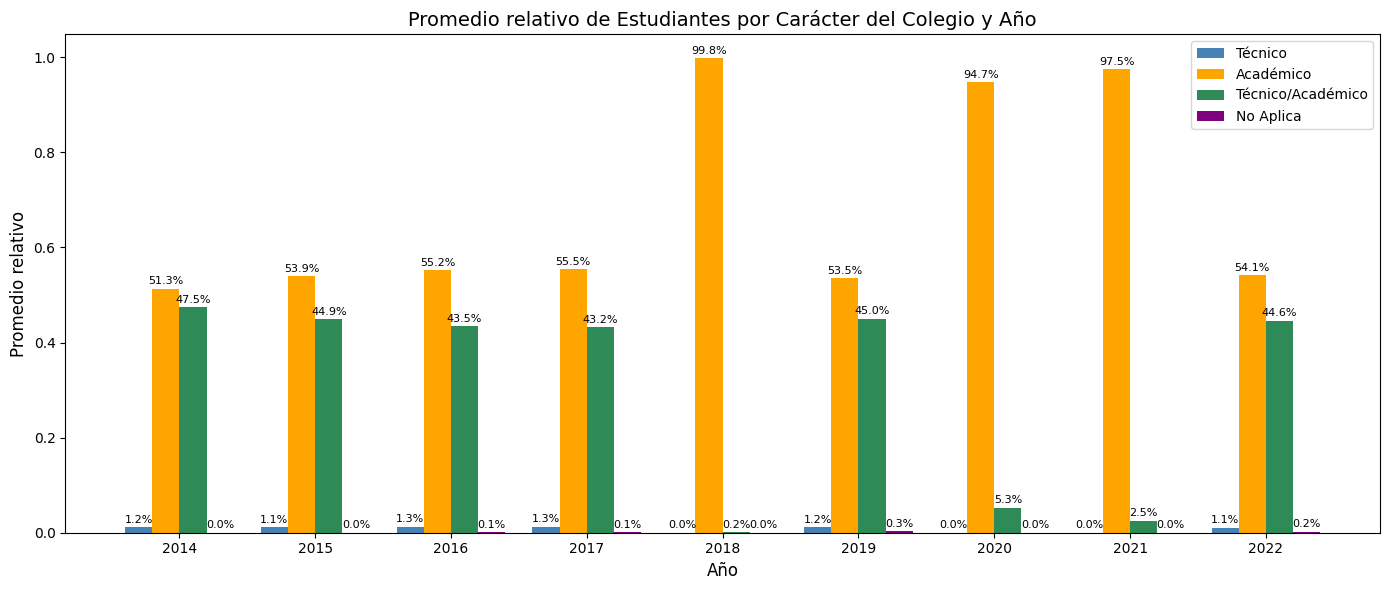

In [28]:
# Filtrar solo los años 2014 a 2022
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()

# Normalizar COLE_CARACTER
df_filtrado['COLE_CARACTER'] = (
    df_filtrado['COLE_CARACTER']
    .astype(str)
    .str.strip()
    .str.upper()
    .apply(lambda x: unidecode.unidecode(x))  # quitar tildes
)

# Contar estudiantes por año y carácter
df_grouped = df_filtrado.groupby(['PERIODO', 'COLE_CARACTER']).size().reset_index(name='Cantidad')

# Calcular el total de estudiantes por año
totales_anio = df_grouped.groupby('PERIODO')['Cantidad'].sum().reset_index(name='Total_Anio')

# Unir para poder calcular el promedio relativo al año
df_grouped = df_grouped.merge(totales_anio, on='PERIODO')

# Calcular promedio relativo (Cantidad / Total_Anio)
df_grouped['Promedio'] = df_grouped['Cantidad'] / df_grouped['Total_Anio']

# Pivotear para tener columnas separadas
df_final = df_grouped.pivot(index='PERIODO', columns='COLE_CARACTER', values='Promedio').fillna(0)

# Renombrar columnas de forma estándar
df_final = df_final.rename(columns={
    'TECNICO': 'CAR_TECNICO',
    'ACADEMICO': 'CAR_ACADEMICO',
    'TECNICO/ACADEMICO': 'CAR_TEC_ACAD',
    'NO APLICA': 'CAR_NO_APLICA'
})

# Asegurar que todas las columnas existan
for col in ['CAR_TECNICO', 'CAR_ACADEMICO', 'CAR_TEC_ACAD', 'CAR_NO_APLICA']:
    if col not in df_final.columns:
        df_final[col] = 0

# Mantener todos los años 2014-2022
años = list(range(2014, 2023))
df_final = df_final.reindex(años, fill_value=0).reset_index().rename(columns={'index': 'PERIODO'})

# Crear gráfico de barras lado a lado
x = np.arange(len(df_final['PERIODO']))
width = 0.2  # ancho de barra para 4 categorías

fig, ax = plt.subplots(figsize=(14, 6))
b1 = ax.bar(x - width*1.5, df_final['CAR_TECNICO'], width, label='Técnico', color='steelblue')
b2 = ax.bar(x - width/2, df_final['CAR_ACADEMICO'], width, label='Académico', color='orange')
b3 = ax.bar(x + width/2, df_final['CAR_TEC_ACAD'], width, label='Técnico/Académico', color='seagreen')
b4 = ax.bar(x + width*1.5, df_final['CAR_NO_APLICA'], width, label='No Aplica', color='purple')

# Personalización
ax.set_title('Promedio relativo de Estudiantes por Carácter del Colegio y Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Promedio relativo', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df_final['PERIODO'])
ax.legend()

# Etiquetas en porcentaje
for bars in [b1, b2, b3, b4]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.005,
                f"{bar.get_height()*100:.1f}%",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


Grafica de promedio de puntaje globla por año, segmentado por genero del estudiante

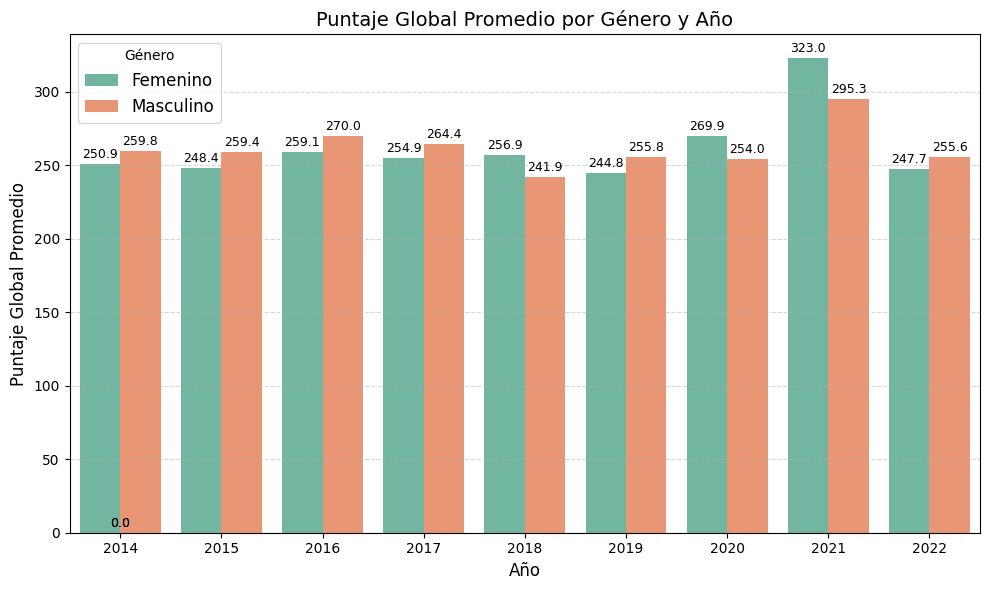

In [29]:
#Calculo del promedio del PUNT_GLOBAL por Genero del estudiante por cada Periodo (año).

promedios_genero_anno = df_nuevo.groupby(['PERIODO','ESTU_GENERO'])['PUNT_GLOBAL'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=promedios_genero_anno,
    x='PERIODO',
    y='PUNT_GLOBAL',
    hue='ESTU_GENERO',
    palette='Set2'
)

plt.title('Puntaje Global Promedio por Género y Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Puntaje Global Promedio', fontsize=12)
plt.legend(title='Género', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar etiquetas encima de cada barra
for p in ax.patches:
    h = p.get_height()
    if np.isfinite(h):  # evitar errores con valores NaN
        ax.text(
            p.get_x() + p.get_width()/2,  # posición x centrada
            h + 2,                       # un poco por encima de la barra
            f"{h:.1f}",                  # valor con 1 decimal
            ha='center', va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()

Top 5 de colegios con mejor puntaje por año segmentado por genero del estudiante en cada colegio (SOLO DE 2014 A 2017)

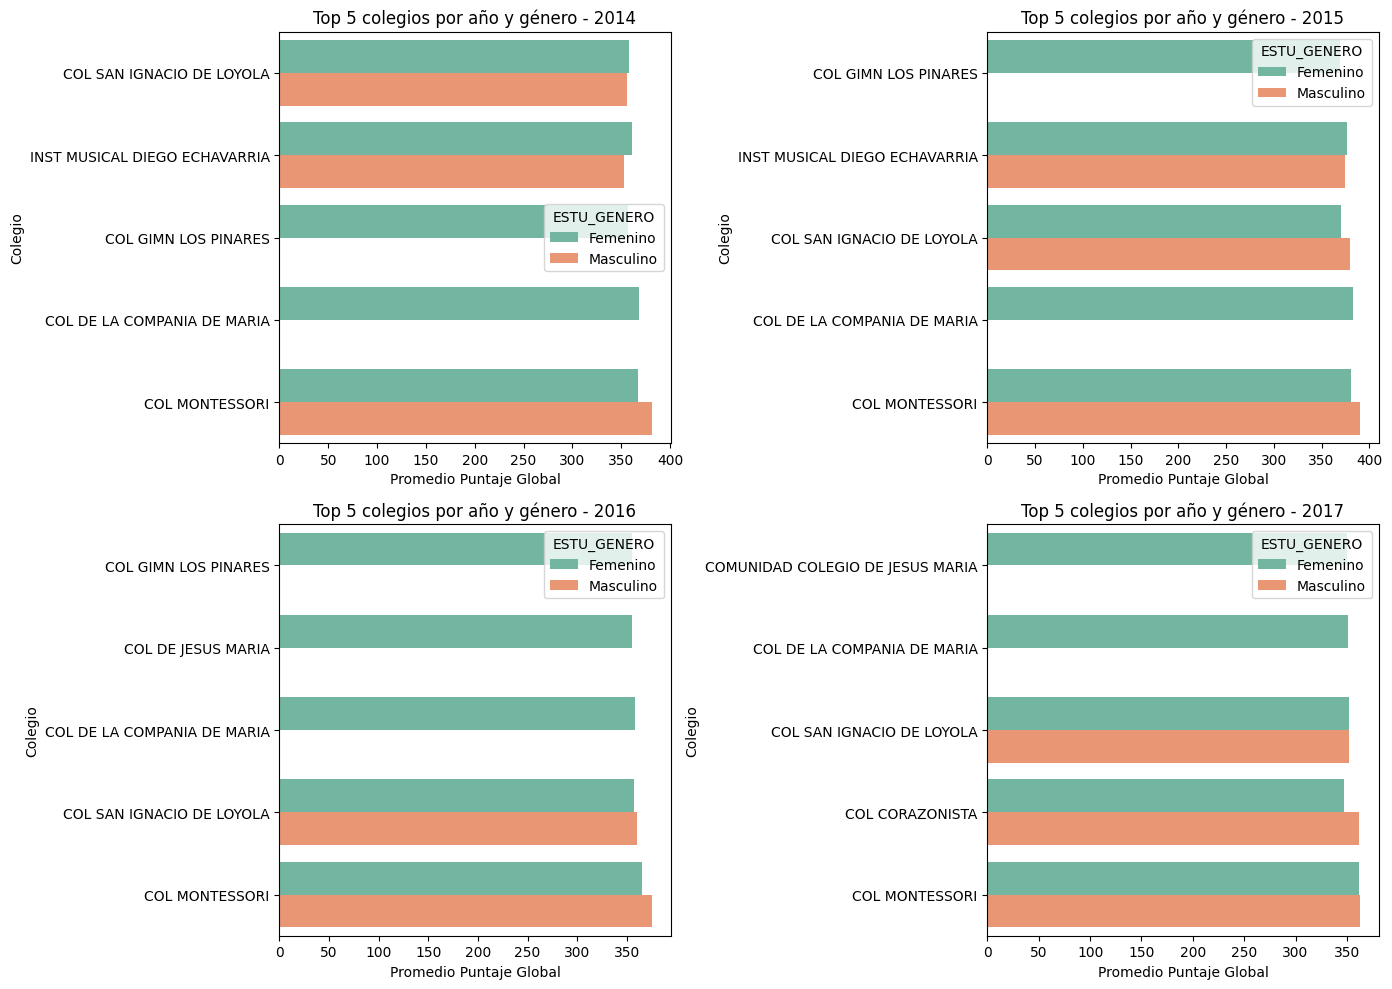

In [30]:
# Se segmenta la información del PERIODO (años) del 2014 al 2017 donde tenemos continuidad en la información para todas las instituciones educativas
annos = [2014, 2015, 2016, 2017]

plt.figure(figsize=(14, 10))

for i, año in enumerate(annos, 1):
    df_año = df_nuevo[df_nuevo['PERIODO'] == año]

    # Calcular top 5 colegios con promedio por género
    top5_colegios = (
        df_año.groupby('COLE_NOMBRE_SEDE')['PUNT_GLOBAL']
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index
    )

    df_top5 = df_año[df_año['COLE_NOMBRE_SEDE'].isin(top5_colegios)]

    # Agrupar por colegio y género, calcular promedio
    df_prom = (
        df_top5.groupby(['COLE_NOMBRE_SEDE', 'ESTU_GENERO'], as_index=False)['PUNT_GLOBAL']
        .mean()
    )

    # Ordenar por promedio de menor a mayor (IMPORTANTEEEE)
    orden_colegios = (
        df_prom.groupby('COLE_NOMBRE_SEDE')['PUNT_GLOBAL']
        .mean()
        .sort_values(ascending=True)
        .index
    )

    # Crear gráfico
    plt.subplot(2, 2, i)
    sns.barplot(
        data=df_prom,
        x='PUNT_GLOBAL',
        y='COLE_NOMBRE_SEDE',
        hue='ESTU_GENERO',
        order=orden_colegios,
        palette='Set2'
    )
    plt.title(f"Top 5 colegios por año y género - {año}")
    plt.xlabel("Promedio Puntaje Global")
    plt.ylabel("Colegio")

plt.tight_layout()
plt.show()

VISUALIZACiÓN  DE ESTUDIANTES CON O SIN INTERNET POR AÑO (Barras y %Participación)

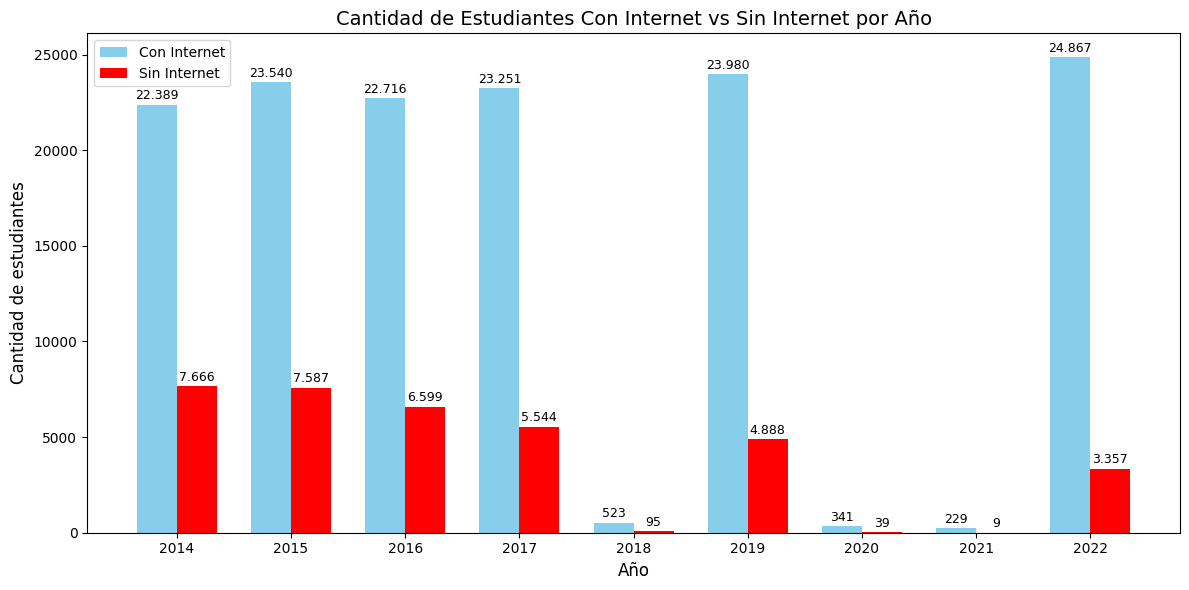

In [31]:
# Filtrar solo los años 2014 a 2022

df_nuevo = pd.read_csv("/content/Saber11_modificado.csv")
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()

# Agrupar por año y valor de COLE_BILINGUE contando estudiantes
df_grouped = df_filtrado.groupby(['PERIODO', 'FAMI_TIENEINTERNET']).size().reset_index(name='Cantidad')

# Pivotear para tener columnas separadas para Si y No
df_final = df_grouped.pivot(index='PERIODO', columns='FAMI_TIENEINTERNET', values='Cantidad').fillna(0)

# Asegurar que estén todas las columnas
if 'Si' not in df_final.columns:
    df_final['Si'] = 0
if 'No' not in df_final.columns:
    df_final['No'] = 0

# Mantener todos los años 2014-2022 en orden
años = list(range(2014, 2023))
df_final = df_final.reindex(años, fill_value=0).reset_index().rename(columns={'index': 'PERIODO'})

# Crear gráfico de barras lado a lado
x = np.arange(len(df_final['PERIODO']))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
b1 = ax.bar(x - width/2, df_final['Si'], width, label='Con Internet', color='skyblue')
b2 = ax.bar(x + width/2, df_final['No'], width, label='Sin Internet', color='red')

# Personalización
ax.set_title('Cantidad de Estudiantes Con Internet vs Sin Internet por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Cantidad de estudiantes', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df_final['PERIODO'])
ax.legend()

# Mostrar etiquetas encima de cada barra
for bars in [b1, b2]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height() + max(df_final['Si'].max(), df_final['No'].max()) * 0.005,
                f"{int(bar.get_height()):,}".replace(",", "."),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

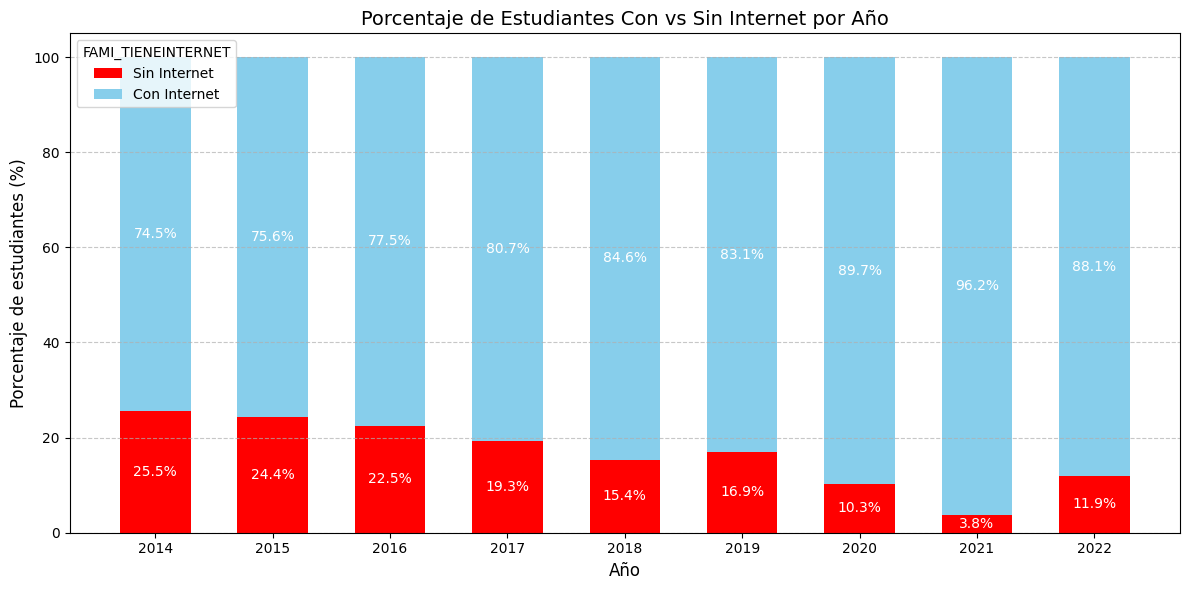

In [32]:
# Filtrar solo los años 2014 a 2022
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()

# Agrupar por año y la variable categórica, contando la cantidad de estudiantes
df_grouped = df_filtrado.groupby(['PERIODO', 'FAMI_TIENEINTERNET']).size().reset_index(name='Cantidad')

# Pivotear la tabla para tener 'Si' y 'No' como columnas
df_final = df_grouped.pivot(index='PERIODO', columns='FAMI_TIENEINTERNET', values='Cantidad').fillna(0)

# Asegurar que las columnas 'Si' y 'No' existan, si no, se crean con valor 0
if 'Si' not in df_final.columns:
    df_final['Si'] = 0
if 'No' not in df_final.columns:
    df_final['No'] = 0

# Calcular el porcentaje de participación para cada categoría por año
df_final['Total'] = df_final['Si'] + df_final['No']
df_final['% Si'] = (df_final['Si'] / df_final['Total']) * 100
df_final['% No'] = (df_final['No'] / df_final['Total']) * 100

# Resetear el índice para que 'PERIODO' sea una columna
df_final = df_final.reset_index()

# Creación del gráfico de barras apiladas por porcentaje ---

fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras apiladas
# Primero se dibuja la base con los porcentajes de 'No'
ax.bar(df_final['PERIODO'], df_final['% No'], label='Sin Internet', color='red', width=0.6)
# Luego, sobre esa base, se apilan las barras de 'Si'
ax.bar(df_final['PERIODO'], df_final['% Si'], bottom=df_final['% No'], label='Con Internet', color='skyblue', width=0.6)

# Personalización del gráfico
ax.set_title('Porcentaje de Estudiantes Con vs Sin Internet por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje de estudiantes (%)', fontsize=12)
ax.set_xticks(df_final['PERIODO']) # Mostrar todos los años del eje x
ax.legend(title='FAMI_TIENEINTERNET', loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir las etiquetas de porcentaje
for i, (p_no, p_si) in df_final[['% No', '% Si']].iterrows():
    # Etiqueta para 'No'
    if p_no > 0:
        ax.text(df_final['PERIODO'][i], p_no / 2, f'{p_no:.1f}%', ha='center', va='center', fontsize=10, color='white')
    # Etiqueta para 'Si'
    if p_si > 0:
        ax.text(df_final['PERIODO'][i], p_no + (p_si / 2), f'{p_si:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

VISUALIZACiÓN  DE ESTUDIANTES CON O SIN LAVADORA POR AÑO (%Participación)

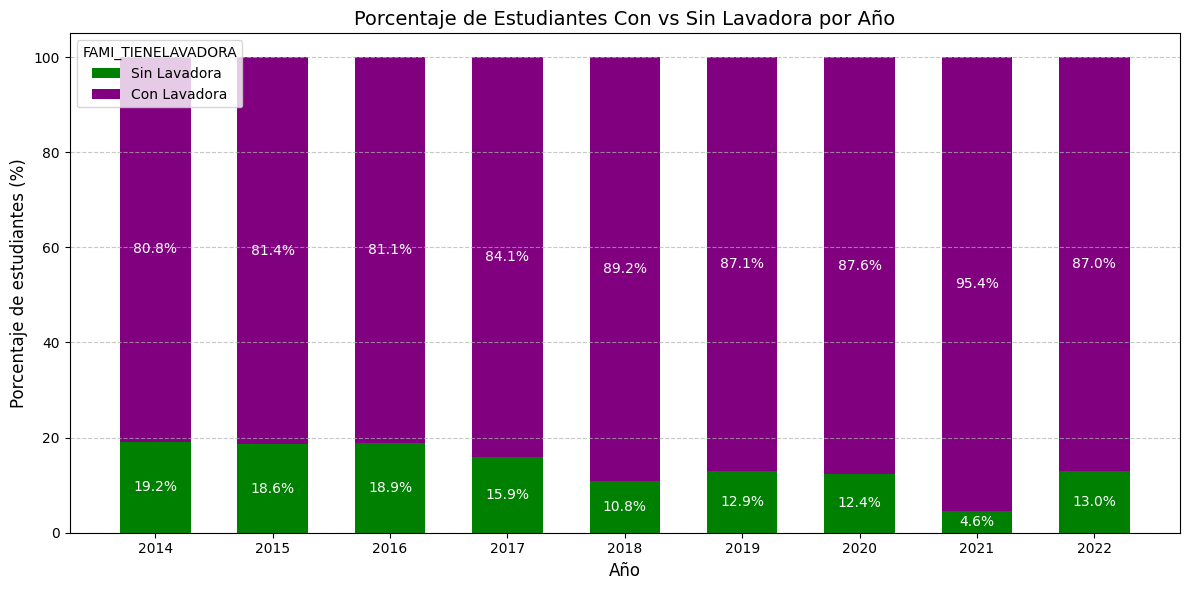

In [33]:
# Filtrar solo los años 2014 a 2022
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()

# Agrupar por año y la variable categórica, contando la cantidad de estudiantes
df_grouped = df_filtrado.groupby(['PERIODO', 'FAMI_TIENELAVADORA']).size().reset_index(name='Cantidad')

# Pivotear la tabla para tener 'Si' y 'No' como columnas
df_final = df_grouped.pivot(index='PERIODO', columns='FAMI_TIENELAVADORA', values='Cantidad').fillna(0)

# Asegurar que las columnas 'Si' y 'No' existan, si no, se crean con valor 0
if 'Si' not in df_final.columns:
    df_final['Si'] = 0
if 'No' not in df_final.columns:
    df_final['No'] = 0

# Calcular el porcentaje de participación para cada categoría por año
df_final['Total'] = df_final['Si'] + df_final['No']
df_final['% Si'] = (df_final['Si'] / df_final['Total']) * 100
df_final['% No'] = (df_final['No'] / df_final['Total']) * 100

# Resetear el índice para que 'PERIODO' sea una columna
df_final = df_final.reset_index()

# Creación del gráfico de barras apiladas por porcentaje ---

fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras apiladas
# Primero se dibuja la base con los porcentajes de 'No'
ax.bar(df_final['PERIODO'], df_final['% No'], label='Sin Lavadora', color='green', width=0.6)
# Luego, sobre esa base, se apilan las barras de 'Si'
ax.bar(df_final['PERIODO'], df_final['% Si'], bottom=df_final['% No'], label='Con Lavadora', color='purple', width=0.6)

# Personalización del gráfico
ax.set_title('Porcentaje de Estudiantes Con vs Sin Lavadora por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje de estudiantes (%)', fontsize=12)
ax.set_xticks(df_final['PERIODO']) # Mostrar todos los años del eje x
ax.legend(title='FAMI_TIENELAVADORA', loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir las etiquetas de porcentaje
for i, (p_no, p_si) in df_final[['% No', '% Si']].iterrows():
    # Etiqueta para 'No'
    if p_no > 0:
        ax.text(df_final['PERIODO'][i], p_no / 2, f'{p_no:.1f}%', ha='center', va='center', fontsize=10, color='white')
    # Etiqueta para 'Si'
    if p_si > 0:
        ax.text(df_final['PERIODO'][i], p_no + (p_si / 2), f'{p_si:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

VISUALIZACIÓN DEL DESEMPEÑO EN INGLÉS POR AÑO

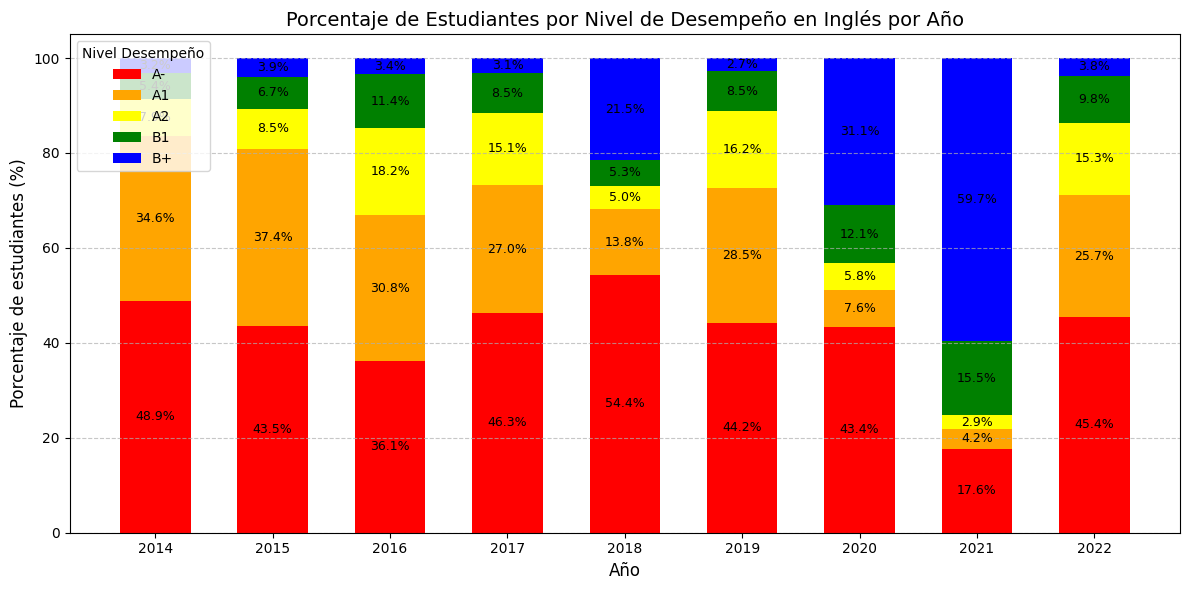

In [34]:
# Filtrar y agrupar los datos
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()
df_grouped = df_filtrado.groupby(['PERIODO', 'Ingles_Nivel']).size().reset_index(name='Cantidad')

# Pivotear y asegurar la presencia de todas las columnas de categorías
categorias_ingles = ['A-', 'A1', 'A2', 'B1', 'B+']
df_final = df_grouped.pivot(index='PERIODO', columns='Ingles_Nivel', values='Cantidad').fillna(0)
for cat in categorias_ingles:
    if cat not in df_final.columns:
        df_final[cat] = 0

# Calcular el porcentaje de manera más eficiente
df_final['Total'] = df_final.sum(axis=1)
for cat in categorias_ingles:
    df_final[f'% {cat}'] = (df_final[cat] / df_final['Total']) * 100

df_final = df_final.reset_index()

#Creación del gráfico apilado

fig, ax = plt.subplots(figsize=(12, 6))

# Nombres de las columnas de porcentaje y colores correspondientes
columnas_porcentaje = [f'% {cat}' for cat in categorias_ingles]
colores = ['red', 'orange', 'yellow', 'green', 'blue']
labels = ['A-', 'A1', 'A2', 'B1', 'B+']

# Variable para llevar el registro del 'bottom' de la barra
bottom = np.zeros(len(df_final))

# Iterar sobre las categorías para crear las barras de forma dinámica
for i, col_porcentaje in enumerate(columnas_porcentaje):
    ax.bar(
        df_final['PERIODO'],
        df_final[col_porcentaje],
        bottom=bottom,
        label=labels[i],
        color=colores[i],
        width=0.6
    )
    # Actualizar la base para la siguiente barra
    bottom += df_final[col_porcentaje]

#Personalización del gráfico

ax.set_title('Porcentaje de Estudiantes por Nivel de Desempeño en Inglés por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje de estudiantes (%)', fontsize=12)
ax.set_xticks(df_final['PERIODO'])
ax.legend(title='Nivel Desempeño', loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

#Añadir las etiquetas de porcentaje
for i, fila in df_final.iterrows():
    bottom_total = 0
    for col_porcentaje in columnas_porcentaje:
        porcentaje_actual = fila[col_porcentaje]
        if porcentaje_actual > 0:
            posicion_y = bottom_total + (porcentaje_actual / 2)
            ax.text(
                fila['PERIODO'],
                posicion_y,
                f'{porcentaje_actual:.1f}%',
                ha='center', va='center', fontsize=9, color='black'
            )
        bottom_total += porcentaje_actual

plt.tight_layout()
plt.show()

VISUALIZACIÓN DE DESEMPEÑO EN MATEMÁTICAS POR AÑO

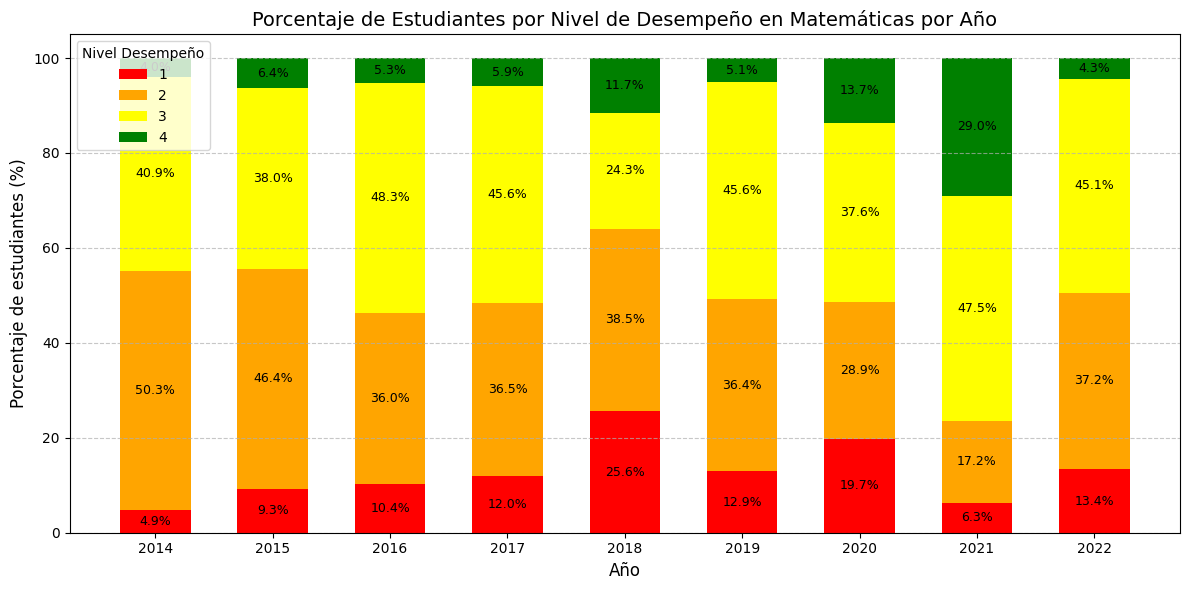

In [35]:
# Filtrar y agrupar los datos
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()
df_filtrado['Matematicas_Nivel'] = df_filtrado['Matematicas_Nivel'].astype(str)

df_grouped = df_filtrado.groupby(['PERIODO', 'Matematicas_Nivel']).size().reset_index(name='Cantidad')

# Pivotear y asegurar la presencia de todas las columnas de categorías
categorias = ['1', '2', '3', '4']
df_final = df_grouped.pivot(index='PERIODO', columns='Matematicas_Nivel', values='Cantidad').fillna(0)
for cat in categorias:
    if cat not in df_final.columns:
        df_final[cat] = 0

# Calcular el porcentaje de manera más eficiente
df_final['Total'] = df_final.sum(axis=1)
for cat in categorias:
    df_final[f'% {cat}'] = (df_final[cat] / df_final['Total']) * 100

df_final = df_final.reset_index()

#Creación del gráfico apilado

fig, ax = plt.subplots(figsize=(12, 6))

# Nombres de las columnas de porcentaje y colores correspondientes
columnas_porcentaje = [f'% {cat}' for cat in categorias]
colores = ['red', 'orange', 'yellow', 'green']
labels = ['1', '2', '3', '4']

# Variable para llevar el registro del 'bottom' de la barra
bottom = np.zeros(len(df_final))

# Iterar sobre las categorías para crear las barras de forma dinámica
for i, col_porcentaje in enumerate(columnas_porcentaje):
    ax.bar(
        df_final['PERIODO'],
        df_final[col_porcentaje],
        bottom=bottom,
        label=labels[i],
        color=colores[i],
        width=0.6
    )
    # Actualizar la base para la siguiente barra
    bottom += df_final[col_porcentaje]

#Personalización del gráfico

ax.set_title('Porcentaje de Estudiantes por Nivel de Desempeño en Matemáticas por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje de estudiantes (%)', fontsize=12)
ax.set_xticks(df_final['PERIODO'])
ax.legend(title='Nivel Desempeño', loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

#Añadir las etiquetas de porcentaje
for i, fila in df_final.iterrows():
    bottom_total = 0
    for col_porcentaje in columnas_porcentaje:
        porcentaje_actual = fila[col_porcentaje]
        if porcentaje_actual > 0:
            posicion_y = bottom_total + (porcentaje_actual / 2)
            ax.text(
                fila['PERIODO'],
                posicion_y,
                f'{porcentaje_actual:.1f}%',
                ha='center', va='center', fontsize=9, color='black'
            )
        bottom_total += porcentaje_actual

plt.tight_layout()
plt.show()

VISUALIZACIÓN DEL DESEMPEÑO EN SOCIALES POR AÑO

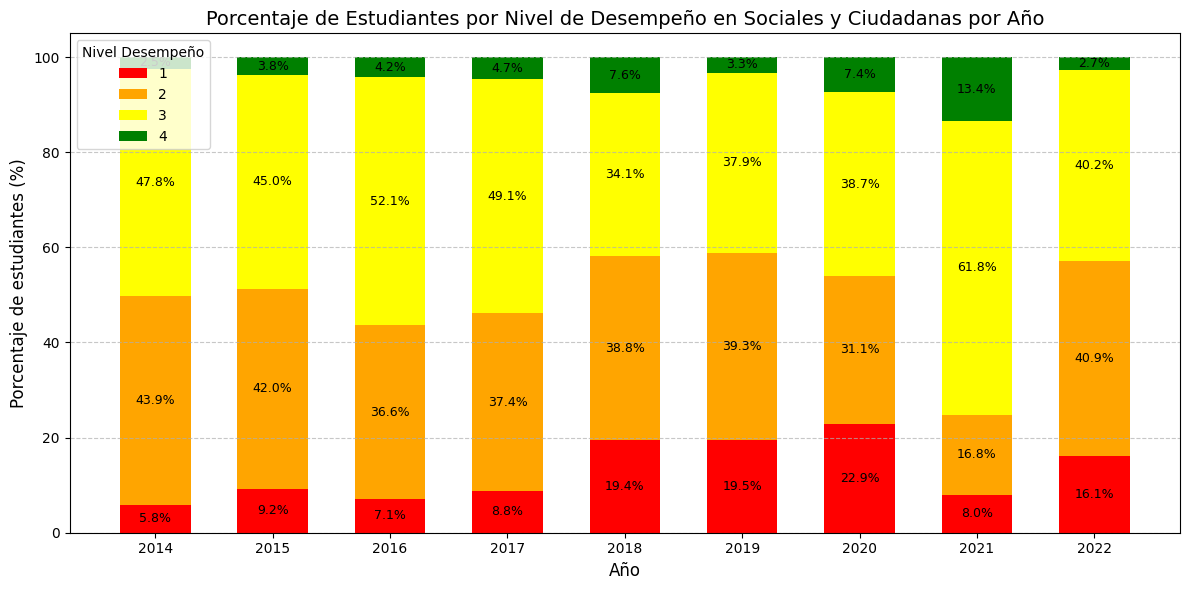

In [36]:
# Filtrar y agrupar los datos
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()
df_filtrado['Sociales_Nivel'] = df_filtrado['Sociales_Nivel'].astype(str)

df_grouped = df_filtrado.groupby(['PERIODO', 'Sociales_Nivel']).size().reset_index(name='Cantidad')

# Pivotear y asegurar la presencia de todas las columnas de categorías
categorias = ['1', '2', '3', '4']
df_final = df_grouped.pivot(index='PERIODO', columns='Sociales_Nivel', values='Cantidad').fillna(0)
for cat in categorias:
    if cat not in df_final.columns:
        df_final[cat] = 0

# Calcular el porcentaje de manera más eficiente
df_final['Total'] = df_final.sum(axis=1)
for cat in categorias:
    df_final[f'% {cat}'] = (df_final[cat] / df_final['Total']) * 100

df_final = df_final.reset_index()

#Creación del gráfico apilado

fig, ax = plt.subplots(figsize=(12, 6))

# Nombres de las columnas de porcentaje y colores correspondientes
columnas_porcentaje = [f'% {cat}' for cat in categorias]
colores = ['red', 'orange', 'yellow', 'green']
labels = ['1', '2', '3', '4']

# Variable para llevar el registro del 'bottom' de la barra
bottom = np.zeros(len(df_final))

# Iterar sobre las categorías para crear las barras de forma dinámica
for i, col_porcentaje in enumerate(columnas_porcentaje):
    ax.bar(
        df_final['PERIODO'],
        df_final[col_porcentaje],
        bottom=bottom,
        label=labels[i],
        color=colores[i],
        width=0.6
    )
    # Actualizar la base para la siguiente barra
    bottom += df_final[col_porcentaje]

#Personalización del gráfico

ax.set_title('Porcentaje de Estudiantes por Nivel de Desempeño en Sociales y Ciudadanas por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje de estudiantes (%)', fontsize=12)
ax.set_xticks(df_final['PERIODO'])
ax.legend(title='Nivel Desempeño', loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

#Añadir las etiquetas de porcentaje
for i, fila in df_final.iterrows():
    bottom_total = 0
    for col_porcentaje in columnas_porcentaje:
        porcentaje_actual = fila[col_porcentaje]
        if porcentaje_actual > 0:
            posicion_y = bottom_total + (porcentaje_actual / 2)
            ax.text(
                fila['PERIODO'],
                posicion_y,
                f'{porcentaje_actual:.1f}%',
                ha='center', va='center', fontsize=9, color='black'
            )
        bottom_total += porcentaje_actual

plt.tight_layout()
plt.show()

VISUALIZACIÓN DEL DESEMPEÑO EN CIENCIAS NATURALES POR AÑO

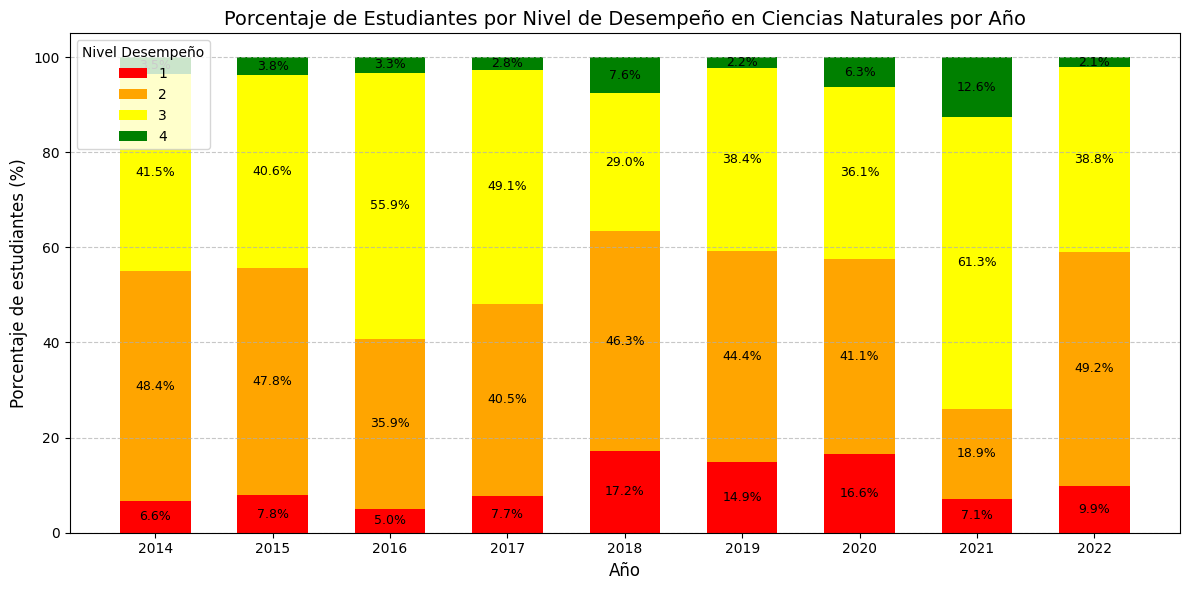

In [37]:
# Filtrar y agrupar los datos
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()
df_filtrado['Ciencias_Nivel'] = df_filtrado['Ciencias_Nivel'].astype(str)

df_grouped = df_filtrado.groupby(['PERIODO', 'Ciencias_Nivel']).size().reset_index(name='Cantidad')

# Pivotear y asegurar la presencia de todas las columnas de categorías
categorias = ['1', '2', '3', '4']
df_final = df_grouped.pivot(index='PERIODO', columns='Ciencias_Nivel', values='Cantidad').fillna(0)
for cat in categorias:
    if cat not in df_final.columns:
        df_final[cat] = 0

# Calcular el porcentaje de manera más eficiente
df_final['Total'] = df_final.sum(axis=1)
for cat in categorias:
    df_final[f'% {cat}'] = (df_final[cat] / df_final['Total']) * 100

df_final = df_final.reset_index()

#Creación del gráfico apilado

fig, ax = plt.subplots(figsize=(12, 6))

# Nombres de las columnas de porcentaje y colores correspondientes
columnas_porcentaje = [f'% {cat}' for cat in categorias]
colores = ['red', 'orange', 'yellow', 'green']
labels = ['1', '2', '3', '4']

# Variable para llevar el registro del 'bottom' de la barra
bottom = np.zeros(len(df_final))

# Iterar sobre las categorías para crear las barras de forma dinámica
for i, col_porcentaje in enumerate(columnas_porcentaje):
    ax.bar(
        df_final['PERIODO'],
        df_final[col_porcentaje],
        bottom=bottom,
        label=labels[i],
        color=colores[i],
        width=0.6
    )
    # Actualizar la base para la siguiente barra
    bottom += df_final[col_porcentaje]

#Personalización del gráfico

ax.set_title('Porcentaje de Estudiantes por Nivel de Desempeño en Ciencias Naturales por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje de estudiantes (%)', fontsize=12)
ax.set_xticks(df_final['PERIODO'])
ax.legend(title='Nivel Desempeño', loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

#Añadir las etiquetas de porcentaje
for i, fila in df_final.iterrows():
    bottom_total = 0
    for col_porcentaje in columnas_porcentaje:
        porcentaje_actual = fila[col_porcentaje]
        if porcentaje_actual > 0:
            posicion_y = bottom_total + (porcentaje_actual / 2)
            ax.text(
                fila['PERIODO'],
                posicion_y,
                f'{porcentaje_actual:.1f}%',
                ha='center', va='center', fontsize=9, color='black'
            )
        bottom_total += porcentaje_actual

plt.tight_layout()
plt.show()

VISUALIZACIÓN DEL DESEMPEÑO EN LECTURA CRÍTICA POR AÑO

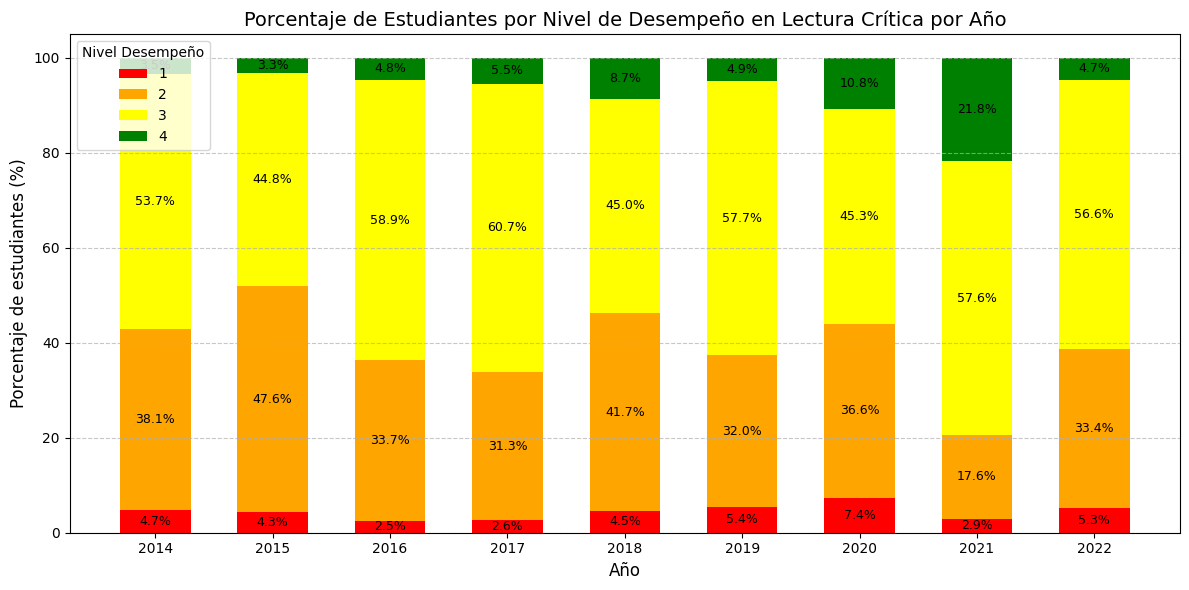

In [38]:
# Filtrar y agrupar los datos
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()
df_filtrado['Lectura_Nivel'] = df_filtrado['Lectura_Nivel'].astype(str)

df_grouped = df_filtrado.groupby(['PERIODO', 'Lectura_Nivel']).size().reset_index(name='Cantidad')

# Pivotear y asegurar la presencia de todas las columnas de categorías
categorias = ['1', '2', '3', '4']
df_final = df_grouped.pivot(index='PERIODO', columns='Lectura_Nivel', values='Cantidad').fillna(0)
for cat in categorias:
    if cat not in df_final.columns:
        df_final[cat] = 0

# Calcular el porcentaje de manera más eficiente
df_final['Total'] = df_final.sum(axis=1)
for cat in categorias:
    df_final[f'% {cat}'] = (df_final[cat] / df_final['Total']) * 100

df_final = df_final.reset_index()

#Creación del gráfico apilado

fig, ax = plt.subplots(figsize=(12, 6))

# Nombres de las columnas de porcentaje y colores correspondientes
columnas_porcentaje = [f'% {cat}' for cat in categorias]
colores = ['red', 'orange', 'yellow', 'green']
labels = ['1', '2', '3', '4']

# Variable para llevar el registro del 'bottom' de la barra
bottom = np.zeros(len(df_final))

# Iterar sobre las categorías para crear las barras de forma dinámica
for i, col_porcentaje in enumerate(columnas_porcentaje):
    ax.bar(
        df_final['PERIODO'],
        df_final[col_porcentaje],
        bottom=bottom,
        label=labels[i],
        color=colores[i],
        width=0.6
    )
    # Actualizar la base para la siguiente barra
    bottom += df_final[col_porcentaje]

#Personalización del gráfico

ax.set_title('Porcentaje de Estudiantes por Nivel de Desempeño en Lectura Crítica por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje de estudiantes (%)', fontsize=12)
ax.set_xticks(df_final['PERIODO'])
ax.legend(title='Nivel Desempeño', loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

#Añadir las etiquetas de porcentaje
for i, fila in df_final.iterrows():
    bottom_total = 0
    for col_porcentaje in columnas_porcentaje:
        porcentaje_actual = fila[col_porcentaje]
        if porcentaje_actual > 0:
            posicion_y = bottom_total + (porcentaje_actual / 2)
            ax.text(
                fila['PERIODO'],
                posicion_y,
                f'{porcentaje_actual:.1f}%',
                ha='center', va='center', fontsize=9, color='black'
            )
        bottom_total += porcentaje_actual

plt.tight_layout()
plt.show()

VISUALIZACIÓN DEL DESEMPEÑO EN EL PUNTAJE GLOBAL POR AÑO

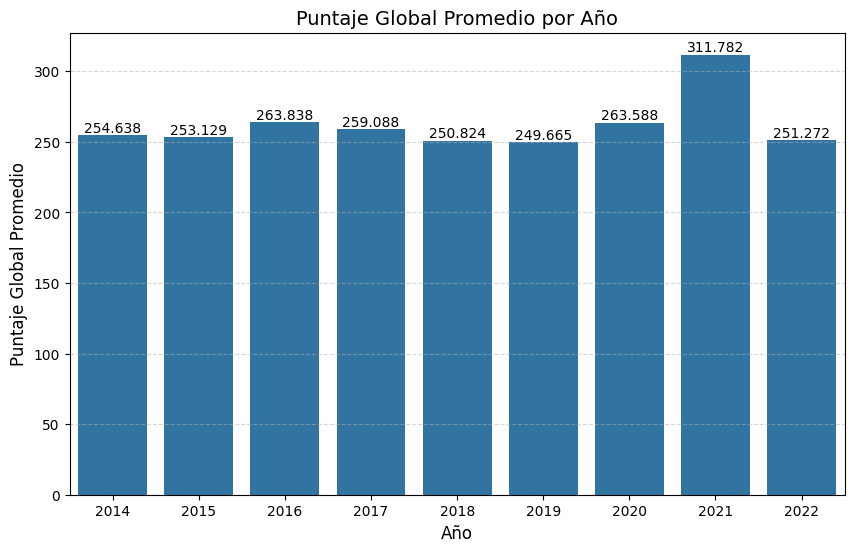

In [39]:
# Filtrar solo los años 2014 a 2022
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()

# Agrupar por año y valor de COLE_BILINGUE contando estudiantes
df_grouped = df_filtrado.groupby(['PERIODO'])['PUNT_GLOBAL'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data = df_grouped, x="PERIODO", y="PUNT_GLOBAL")
ax.bar_label(ax.containers[0], fontsize=10);

plt.title('Puntaje Global Promedio por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Puntaje Global Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

VISUALIZACIÓN DE PORCENTAJE DE EDUCACIÓN PADRES y MADRES

/tmp/ipython-input-4065650370.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', len(categorias))


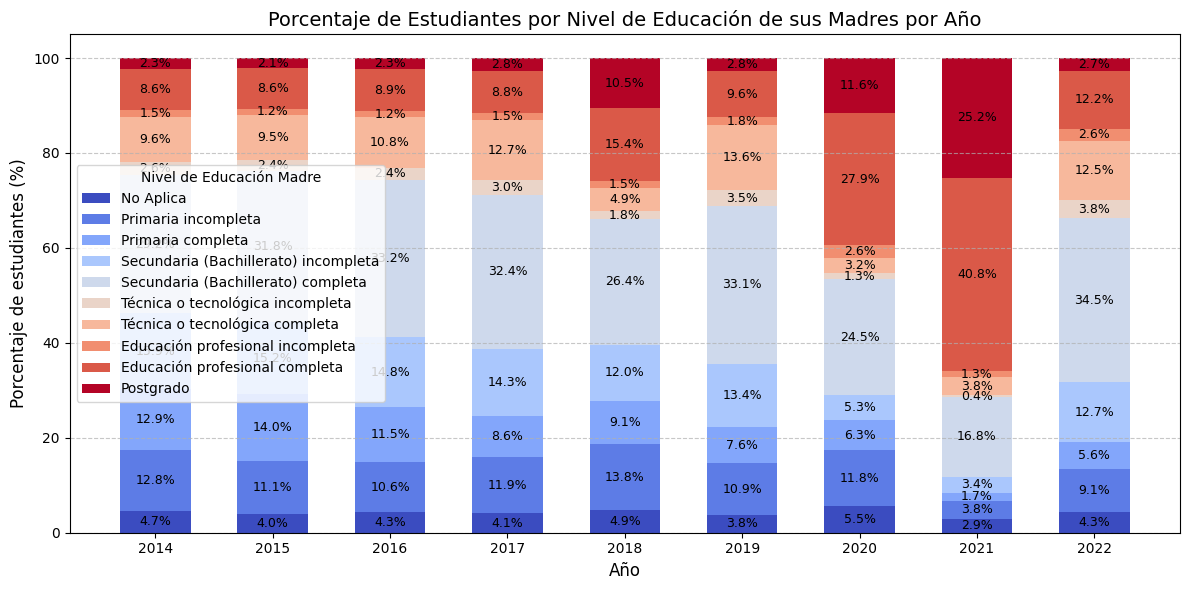

In [40]:
# Filtrar y agrupar los datos
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()
df_filtrado['FAMI_EDUCACIONMADRE'] = df_filtrado['FAMI_EDUCACIONMADRE'].astype(str)

df_grouped = df_filtrado.groupby(['PERIODO', 'FAMI_EDUCACIONMADRE']).size().reset_index(name='Cantidad')

# Pivotear y asegurar la presencia de todas las columnas de categorías
categorias = ['No Aplica','Primaria incompleta','Primaria completa','Secundaria (Bachillerato) incompleta',
'Secundaria (Bachillerato) completa','Técnica o tecnológica incompleta', 'Técnica o tecnológica completa','Educación profesional incompleta',
'Educación profesional completa','Postgrado']
df_final = df_grouped.pivot(index='PERIODO', columns='FAMI_EDUCACIONMADRE', values='Cantidad').fillna(0)
for cat in categorias:
    if cat not in df_final.columns:
        df_final[cat] = 0

# Calcular el porcentaje de manera más eficiente
df_final['Total'] = df_final.sum(axis=1)
for cat in categorias:
    df_final[f'% {cat}'] = (df_final[cat] / df_final['Total']) * 100

df_final = df_final.reset_index()

#Creación del gráfico apilado

fig, ax = plt.subplots(figsize=(12, 6))

# Nombres de las columnas de porcentaje y colores correspondientes
columnas_porcentaje = [f'% {cat}' for cat in categorias]
cmap = cm.get_cmap('coolwarm', len(categorias))
labels =  ['No Aplica','Primaria incompleta','Primaria completa','Secundaria (Bachillerato) incompleta',
'Secundaria (Bachillerato) completa','Técnica o tecnológica incompleta', 'Técnica o tecnológica completa','Educación profesional incompleta',
'Educación profesional completa','Postgrado']

# Variable para llevar el registro del 'bottom' de la barra
bottom = np.zeros(len(df_final))

# Iterar sobre las categorías para crear las barras de forma dinámica
for i, col_porcentaje in enumerate(columnas_porcentaje):
    ax.bar(
        df_final['PERIODO'],
        df_final[col_porcentaje],
        bottom=bottom,
        label=labels[i],
        color=cmap(i),
        width=0.6
    )
    # Actualizar la base para la siguiente barra
    bottom += df_final[col_porcentaje]

#Personalización del gráfico

ax.set_title('Porcentaje de Estudiantes por Nivel de Educación de sus Madres por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje de estudiantes (%)', fontsize=12)
ax.set_xticks(df_final['PERIODO'])
ax.legend(title='Nivel de Educación Madre', loc='best')
ax.grid(axis='y', linestyle='--', alpha=0.7)

#Añadir las etiquetas de porcentaje
for i, fila in df_final.iterrows():
    bottom_total = 0
    for col_porcentaje in columnas_porcentaje:
        porcentaje_actual = fila[col_porcentaje]
        if porcentaje_actual > 0:
            posicion_y = bottom_total + (porcentaje_actual / 2)
            ax.text(
                fila['PERIODO'],
                posicion_y,
                f'{porcentaje_actual:.1f}%',
                ha='center', va='center', fontsize=9, color='black'
            )
        bottom_total += porcentaje_actual

plt.tight_layout()
plt.show()

/tmp/ipython-input-2118160895.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', len(categorias))


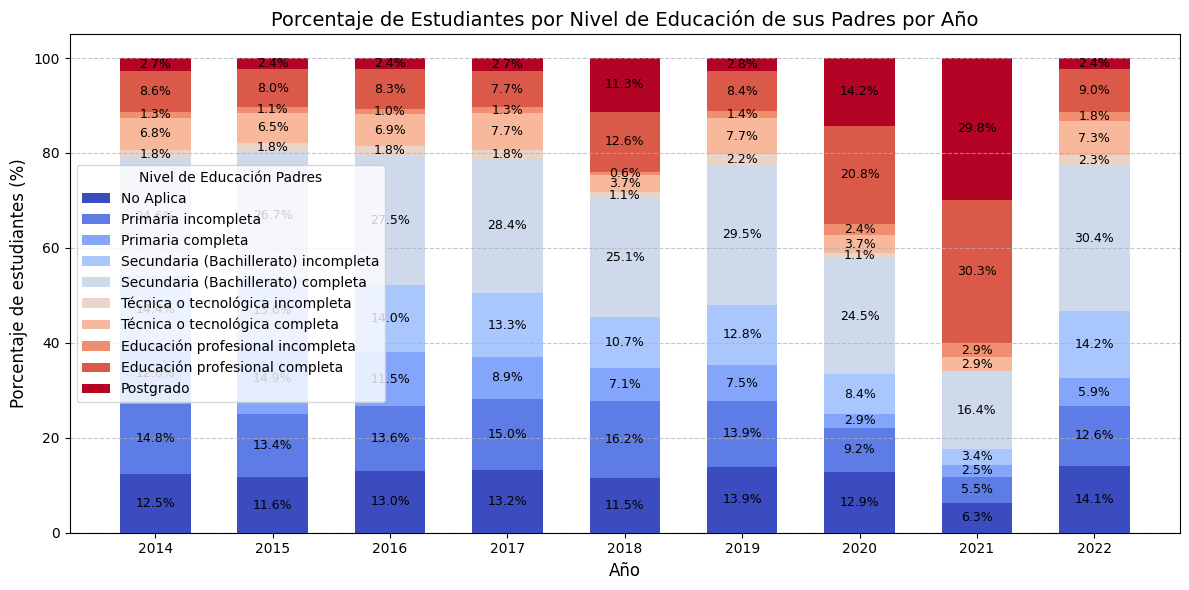

In [41]:
# Filtrar y agrupar los datos
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()
df_filtrado['FAMI_EDUCACIONPADRE'] = df_filtrado['FAMI_EDUCACIONPADRE'].astype(str)

df_grouped = df_filtrado.groupby(['PERIODO', 'FAMI_EDUCACIONPADRE']).size().reset_index(name='Cantidad')

# Pivotear y asegurar la presencia de todas las columnas de categorías
categorias = ['No Aplica','Primaria incompleta','Primaria completa','Secundaria (Bachillerato) incompleta',
'Secundaria (Bachillerato) completa','Técnica o tecnológica incompleta', 'Técnica o tecnológica completa','Educación profesional incompleta',
'Educación profesional completa','Postgrado']
df_final = df_grouped.pivot(index='PERIODO', columns='FAMI_EDUCACIONPADRE', values='Cantidad').fillna(0)
for cat in categorias:
    if cat not in df_final.columns:
        df_final[cat] = 0

# Calcular el porcentaje de manera más eficiente
df_final['Total'] = df_final.sum(axis=1)
for cat in categorias:
    df_final[f'% {cat}'] = (df_final[cat] / df_final['Total']) * 100

df_final = df_final.reset_index()

#Creación del gráfico apilado

fig, ax = plt.subplots(figsize=(12, 6))

# Nombres de las columnas de porcentaje y colores correspondientes
columnas_porcentaje = [f'% {cat}' for cat in categorias]
cmap = cm.get_cmap('coolwarm', len(categorias))
labels =  ['No Aplica','Primaria incompleta','Primaria completa','Secundaria (Bachillerato) incompleta',
'Secundaria (Bachillerato) completa','Técnica o tecnológica incompleta', 'Técnica o tecnológica completa','Educación profesional incompleta',
'Educación profesional completa','Postgrado']

# Variable para llevar el registro del 'bottom' de la barra
bottom = np.zeros(len(df_final))

# Iterar sobre las categorías para crear las barras de forma dinámica
for i, col_porcentaje in enumerate(columnas_porcentaje):
    ax.bar(
        df_final['PERIODO'],
        df_final[col_porcentaje],
        bottom=bottom,
        label=labels[i],
        color=cmap(i),
        width=0.6
    )
    # Actualizar la base para la siguiente barra
    bottom += df_final[col_porcentaje]

#Personalización del gráfico

ax.set_title('Porcentaje de Estudiantes por Nivel de Educación de sus Padres por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje de estudiantes (%)', fontsize=12)
ax.set_xticks(df_final['PERIODO'])
ax.legend(title='Nivel de Educación Padres', loc='best')
ax.grid(axis='y', linestyle='--', alpha=0.7)

#Añadir las etiquetas de porcentaje
for i, fila in df_final.iterrows():
    bottom_total = 0
    for col_porcentaje in columnas_porcentaje:
        porcentaje_actual = fila[col_porcentaje]
        if porcentaje_actual > 0:
            posicion_y = bottom_total + (porcentaje_actual / 2)
            ax.text(
                fila['PERIODO'],
                posicion_y,
                f'{porcentaje_actual:.1f}%',
                ha='center', va='center', fontsize=9, color='black'
            )
        bottom_total += porcentaje_actual

plt.tight_layout()
plt.show()

VISUALIZACIÓN PROMEDIO PUNT GLOBAL POR ESTRATO (BAJO y ALTO)

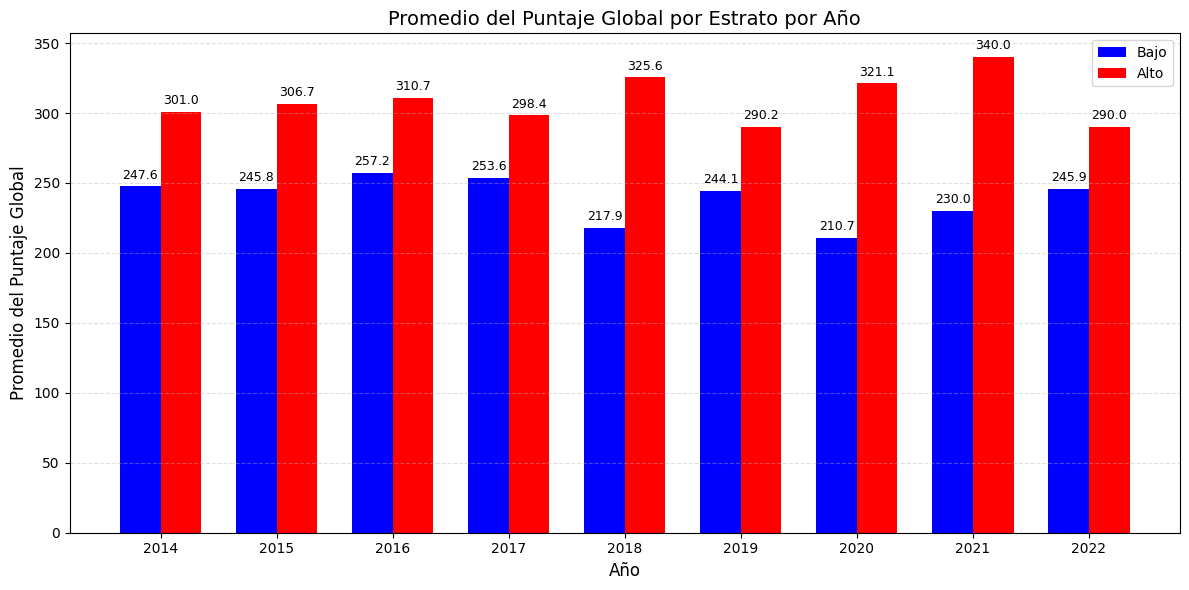

In [42]:
# Filtrar solo los años 2014 a 2022
df_filtrado = df_nuevo[df_nuevo['PERIODO'].between(2014, 2022)].copy()

#Asegurar que FAMI_ESTRATOVIVIENDA sea numérico (coerce manda no-numéricos a NaN)
df_filtrado['FAMI_ESTRATOVIVIENDA'] = pd.to_numeric(df_filtrado['FAMI_ESTRATOVIVIENDA'], errors='coerce')

#Crear columna de estrato agregado BAJO/ALTO a partir de la variable FAMI_ESTRATOVIVIENDA
df_filtrado['Estrato'] = np.where(df_filtrado['FAMI_ESTRATOVIVIENDA'] <= 3, 'BAJO',
                          np.where(df_filtrado['FAMI_ESTRATOVIVIENDA'] > 3, 'ALTO', 'SIN CLASIFICAR'))

# Agrupar por año y valor de puntaje global contando por estrato.
df_grouped = (df_filtrado.groupby(['PERIODO','Estrato'])['PUNT_GLOBAL'].mean().reset_index(name='Promedio'))

# Pivotear para tener columnas separadas para Bajo y Alto.
df_final = df_grouped.pivot(index='PERIODO', columns='Estrato', values='Promedio').fillna(0)

# Asegurar que estén todas las columnas
for col in ['BAJO', 'ALTO']:
    if col not in df_final.columns:
        df_final[col] = np.nan  # o 0 si prefieres
df_final = df_final[['BAJO', 'ALTO']]

# Mantener todos los años 2014-2022 en orden
años = list(range(2014, 2023))
df_final = df_final.reindex(años, fill_value=0).reset_index().rename(columns={'index': 'PERIODO'})

# Crear gráfico de barras lado a lado
x = np.arange(len(df_final['PERIODO']))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
b1 = ax.bar(x - width/2, df_final['BAJO'], width, label='Bajo', color='blue')
b2 = ax.bar(x + width/2, df_final['ALTO'], width, label='Alto', color='red')

# Personalización
ax.set_title('Promedio del Puntaje Global por Estrato por Año', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Promedio del Puntaje Global', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df_final['PERIODO'])
ax.legend()

# Mostrar etiquetas encima de cada barra
ymax = np.nanmax([df_final['BAJO'].max(), df_final['ALTO'].max()])
offset = 0.01 * ymax if np.isfinite(ymax) else 0

for bars in [b1, b2]:
    for bar in bars:
        h = bar.get_height()
        if np.isfinite(h):
            ax.text(bar.get_x() + bar.get_width()/2,
                    h + offset,
                    f"{h:.1f}",
                    ha='center', va='bottom', fontsize=9)

ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **Codificación de todo el dataframe: df_codificado**



In [43]:
#Construir dataframe con las variables necesarias para la correlación y el modelado y que inicialmente serán codificadas.
df_codificado = pd.DataFrame(df_nuevo, columns=['COLE_AREA_UBICACION','COLE_BILINGUE','COLE_CARACTER','COLE_GENERO','COLE_JORNADA','COLE_NATURALEZA',
'COLE_SEDE_PRINCIPAL','ESTU_GENERO','FAMI_CUARTOSHOGAR','FAMI_EDUCACIONMADRE','FAMI_EDUCACIONPADRE','FAMI_ESTRATOVIVIENDA',
'FAMI_PERSONASHOGAR','FAMI_TIENEAUTOMOVIL','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_TIENELAVADORA','PUNT_GLOBAL',
'Ingles_Nivel','Matematicas_Nivel','Sociales_Nivel','Ciencias_Nivel','Lectura_Nivel','CLASIFICACIÓN'])


df_codificado.shape
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177620 entries, 0 to 177619
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   COLE_AREA_UBICACION   177620 non-null  object 
 1   COLE_BILINGUE         177620 non-null  object 
 2   COLE_CARACTER         177620 non-null  object 
 3   COLE_GENERO           177620 non-null  object 
 4   COLE_JORNADA          177620 non-null  object 
 5   COLE_NATURALEZA       177620 non-null  object 
 6   COLE_SEDE_PRINCIPAL   177620 non-null  object 
 7   ESTU_GENERO           177620 non-null  object 
 8   FAMI_CUARTOSHOGAR     177620 non-null  object 
 9   FAMI_EDUCACIONMADRE   177620 non-null  object 
 10  FAMI_EDUCACIONPADRE   177620 non-null  object 
 11  FAMI_ESTRATOVIVIENDA  177620 non-null  int64  
 12  FAMI_PERSONASHOGAR    177620 non-null  object 
 13  FAMI_TIENEAUTOMOVIL   177620 non-null  object 
 14  FAMI_TIENECOMPUTADOR  177620 non-null  object 
 15  

In [44]:
#Codificación de opciones en variables categóricas.

#Columnas a reemplazar información
columnas_reemplazo1 = ['COLE_AREA_UBICACION','COLE_BILINGUE','COLE_CARACTER','COLE_GENERO','COLE_JORNADA','COLE_NATURALEZA',
'COLE_SEDE_PRINCIPAL','ESTU_GENERO','FAMI_CUARTOSHOGAR','FAMI_EDUCACIONMADRE','FAMI_EDUCACIONPADRE','FAMI_ESTRATOVIVIENDA',
'FAMI_PERSONASHOGAR','FAMI_TIENEAUTOMOVIL','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_TIENELAVADORA','PUNT_GLOBAL',
'Ingles_Nivel','Matematicas_Nivel','Sociales_Nivel','Ciencias_Nivel','Lectura_Nivel','CLASIFICACIÓN']

#Definir el diccionario de mapeo para reemplazar información en las columnas
mapeo_codificacion = {
    'Si': 1,
    'No': 0,
    'URBANO': 1,
    'RURAL': 0,
    'Femenino': 0,
    'Masculino': 1,
    'Uno': 1,
    'Dos': 2,
    'Tres': 3,
    'Cuatro': 4,
    'Cinco': 5,
    'Seis o mas': 6,
    'No Aplica': 0,
    'A-': 0,
    'A1': 1,
    'A2': 2,
    'B1': 3,
    'B+': 4,
    '1 a 2': 1,
    '3 a 4': 2,
    '5 a 6': 3,
    '7 a 8': 4,
    '9 o más': 5,
    'OFICIAL': 1,
    'NO OFICIAL': 0,
    'NO APLICA': 0,
    'ACADÉMICO': 1,
    'TÉCNICO/ACADÉMICO': 2,
    'TÉCNICO':  3,
    'MIXTO': 1,
    'MASCULINO': 2,
    'FEMENINO': 3,
    'No Aplica': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Técnica o tecnológica incompleta': 5,
    'Técnica o tecnológica completa': 6,
    'Educación profesional incompleta': 7,
    'Educación profesional completa': 8,
    'Postgrado': 9,
    'SABATINA': 0,
    'NOCHE': 1,
    'MAÑANA': 2,
    'TARDE': 3,
    'UNICA': 4,
    'COMPLETA': 5,
    'MENOR AL PUNT NACIONAL':0,
    'SUPERIOR AL PUNT NACIONAL':1,
    'BECA GENERACIÓN E':2,
}

#Sentencia para codificar en la columnas haciendo uso del diccionario.
for columna in columnas_reemplazo1:
    df_codificado[columna].replace(mapeo_codificacion, inplace=True)

/tmp/ipython-input-709080109.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_codificado[columna].replace(mapeo_codificacion, inplace=True)
/tmp/ipython-input-709080109.py:66: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_codificado[columna].replace(mapeo_codificacion, inplace=True)


In [45]:
df_codificado = df_codificado.astype(float)
df_codificado.info()
df_codificado.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177620 entries, 0 to 177619
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   COLE_AREA_UBICACION   177620 non-null  float64
 1   COLE_BILINGUE         177620 non-null  float64
 2   COLE_CARACTER         177620 non-null  float64
 3   COLE_GENERO           177620 non-null  float64
 4   COLE_JORNADA          177620 non-null  float64
 5   COLE_NATURALEZA       177620 non-null  float64
 6   COLE_SEDE_PRINCIPAL   177620 non-null  float64
 7   ESTU_GENERO           177620 non-null  float64
 8   FAMI_CUARTOSHOGAR     177620 non-null  float64
 9   FAMI_EDUCACIONMADRE   177620 non-null  float64
 10  FAMI_EDUCACIONPADRE   177620 non-null  float64
 11  FAMI_ESTRATOVIVIENDA  177620 non-null  float64
 12  FAMI_PERSONASHOGAR    177620 non-null  float64
 13  FAMI_TIENEAUTOMOVIL   177620 non-null  float64
 14  FAMI_TIENECOMPUTADOR  177620 non-null  float64
 15  

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,ESTU_GENERO,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,Ingles_Nivel,Matematicas_Nivel,Sociales_Nivel,Ciencias_Nivel,Lectura_Nivel,CLASIFICACIÓN
0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,5.0,3.0,...,0.0,1.0,1.0,249.0,0.0,3.0,3.0,2.0,3.0,0.0
1,1.0,0.0,3.0,1.0,5.0,0.0,1.0,1.0,3.0,6.0,...,1.0,1.0,1.0,355.0,3.0,4.0,4.0,3.0,3.0,2.0
2,1.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,5.0,0.0,...,1.0,1.0,1.0,253.0,1.0,3.0,2.0,2.0,3.0,0.0
3,1.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0,...,1.0,1.0,1.0,264.0,1.0,3.0,2.0,3.0,3.0,1.0
4,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,...,1.0,1.0,1.0,198.0,0.0,1.0,2.0,2.0,2.0,0.0



# **Escalación de todo el df_codificado y cálculo de matriz de correlación**

In [46]:
columnas_a_estandarizar = ['COLE_AREA_UBICACION','COLE_BILINGUE','COLE_CARACTER','COLE_GENERO','COLE_JORNADA','COLE_NATURALEZA',
'COLE_SEDE_PRINCIPAL','ESTU_GENERO','FAMI_CUARTOSHOGAR','FAMI_EDUCACIONMADRE','FAMI_EDUCACIONPADRE','FAMI_ESTRATOVIVIENDA',
'FAMI_PERSONASHOGAR','FAMI_TIENEAUTOMOVIL','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_TIENELAVADORA','PUNT_GLOBAL',
'Ingles_Nivel','Matematicas_Nivel','Sociales_Nivel','Ciencias_Nivel','Lectura_Nivel','CLASIFICACIÓN']

scaler = StandardScaler()
df_estandarizado_array = scaler.fit_transform(df_codificado[columnas_a_estandarizar])

df_estandarizado = pd.DataFrame(df_estandarizado_array, columns=columnas_a_estandarizar)

df_estandarizado.head()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,ESTU_GENERO,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,Ingles_Nivel,Matematicas_Nivel,Sociales_Nivel,Ciencias_Nivel,Lectura_Nivel,CLASIFICACIÓN
0,0.169543,-0.048859,1.015391,-0.306692,-1.792952,-1.261449,0.128403,-0.878847,2.289362,-0.432370,...,-1.796787,0.502286,0.443489,-0.125133,-0.872833,0.751133,0.801065,-0.599347,0.622508,-0.868059
1,0.169543,-0.048859,2.922423,-0.306692,1.920993,-1.261449,0.128403,1.137855,0.190181,0.907817,...,0.556549,0.502286,0.443489,1.962808,1.834640,2.086966,2.168798,0.851185,0.622508,2.571489
2,0.169543,-0.048859,-0.891641,-0.306692,0.435415,-1.261449,0.128403,1.137855,2.289362,-1.772558,...,0.556549,0.502286,0.443489,-0.046343,0.029658,0.751133,-0.566667,-0.599347,0.622508,-0.868059
3,0.169543,-0.048859,1.015391,-0.306692,-0.307374,0.792739,0.128403,1.137855,-0.859409,0.014359,...,0.556549,0.502286,0.443489,0.170330,0.029658,0.751133,-0.566667,0.851185,0.622508,0.851715
4,0.169543,-0.048859,-0.891641,-0.306692,-1.792952,-1.261449,0.128403,-0.878847,0.190181,-1.325829,...,0.556549,0.502286,0.443489,-1.129708,-0.872833,-1.920532,-0.566667,-0.599347,-0.935363,-0.868059


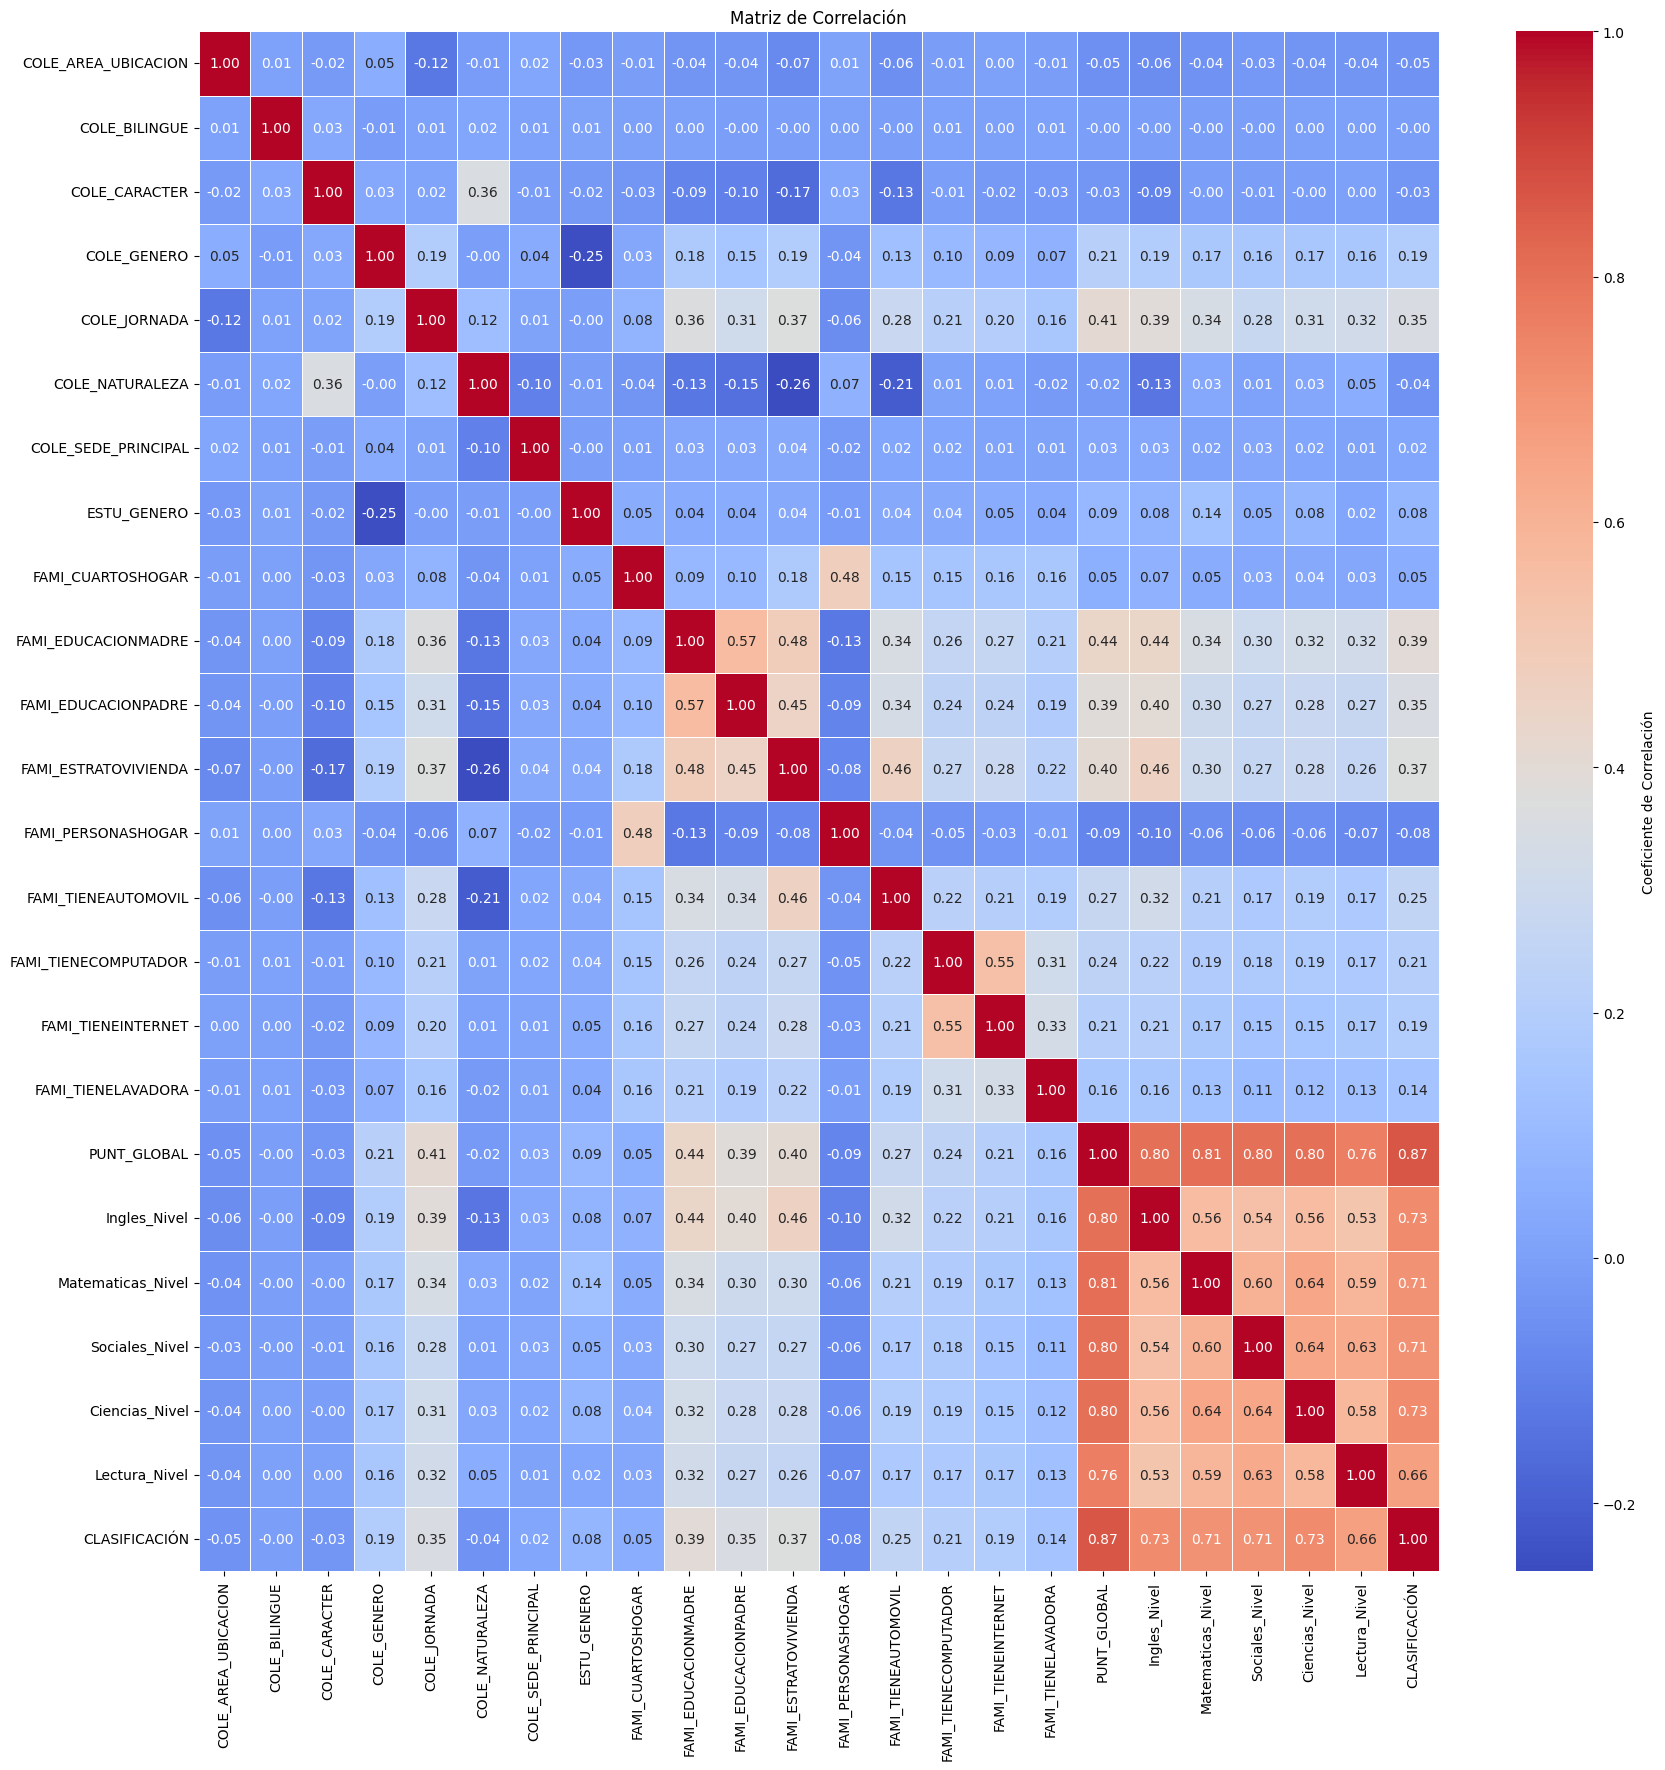

In [47]:
# Calcular matriz de correlación de las variables
matriz_correlacion = df_estandarizado.corr()

# Definir el tamaño del gráfico
plt.figure(figsize=(20, 20))

# Crear el mapa de calor
# annot=True muestra los valores de correlación en las celdas
# fmt='.2f' formatea los valores a dos decimales
# cmap='coolwarm' usa una paleta de colores divergente (azul para negativo, rojo para positivo)
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlación'}
)

# Añadir un título al gráfico
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

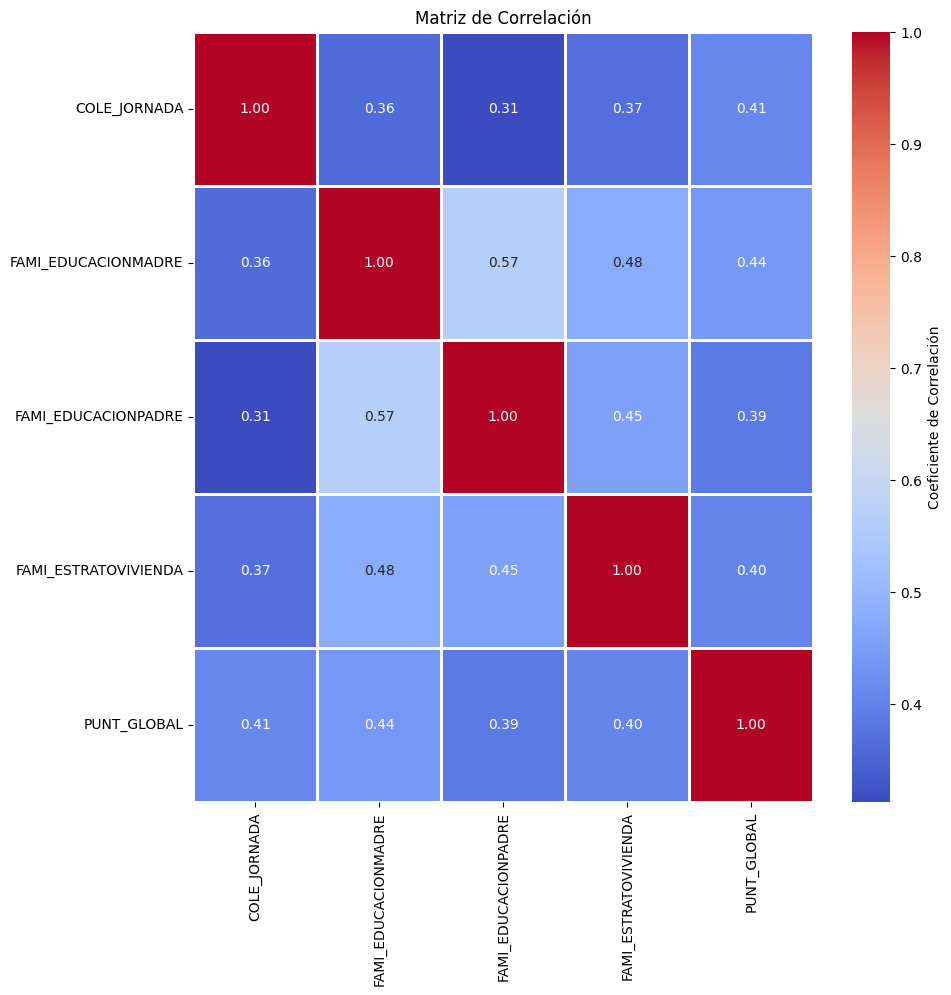

In [48]:
columnas = ["COLE_JORNADA", "FAMI_EDUCACIONMADRE",
            "FAMI_EDUCACIONPADRE", "FAMI_ESTRATOVIVIENDA","PUNT_GLOBAL"]

matriz_correlacion = df_estandarizado[columnas].corr()

# Definir el tamaño del gráfico
plt.figure(figsize=(10, 10))

# Crear el mapa de calor
# annot=True muestra los valores de correlación en las celdas
# fmt='.2f' formatea los valores a dos decimales
# cmap='coolwarm' usa una paleta de colores divergente (azul para negativo, rojo para positivo)
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=1,
    cbar_kws={'label': 'Coeficiente de Correlación'}
)

# Añadir un título al gráfico
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

# **CASO 1 COMPARACIÓN MODELOS EN 3 CATEGORIAS**

## **ARBOL DE DECISION**

Reporte de clasificación:
               precision    recall  f1-score   support

      Becado       0.47      0.16      0.24      1561
    Inferior       0.65      0.85      0.74     19205
    Superior       0.61      0.42      0.50     14758

    accuracy                           0.64     35524
   macro avg       0.58      0.48      0.49     35524
weighted avg       0.63      0.64      0.62     35524



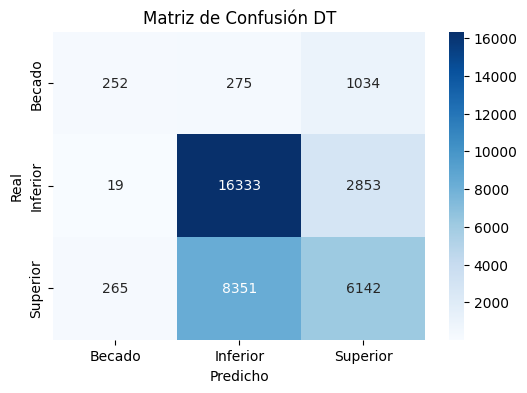

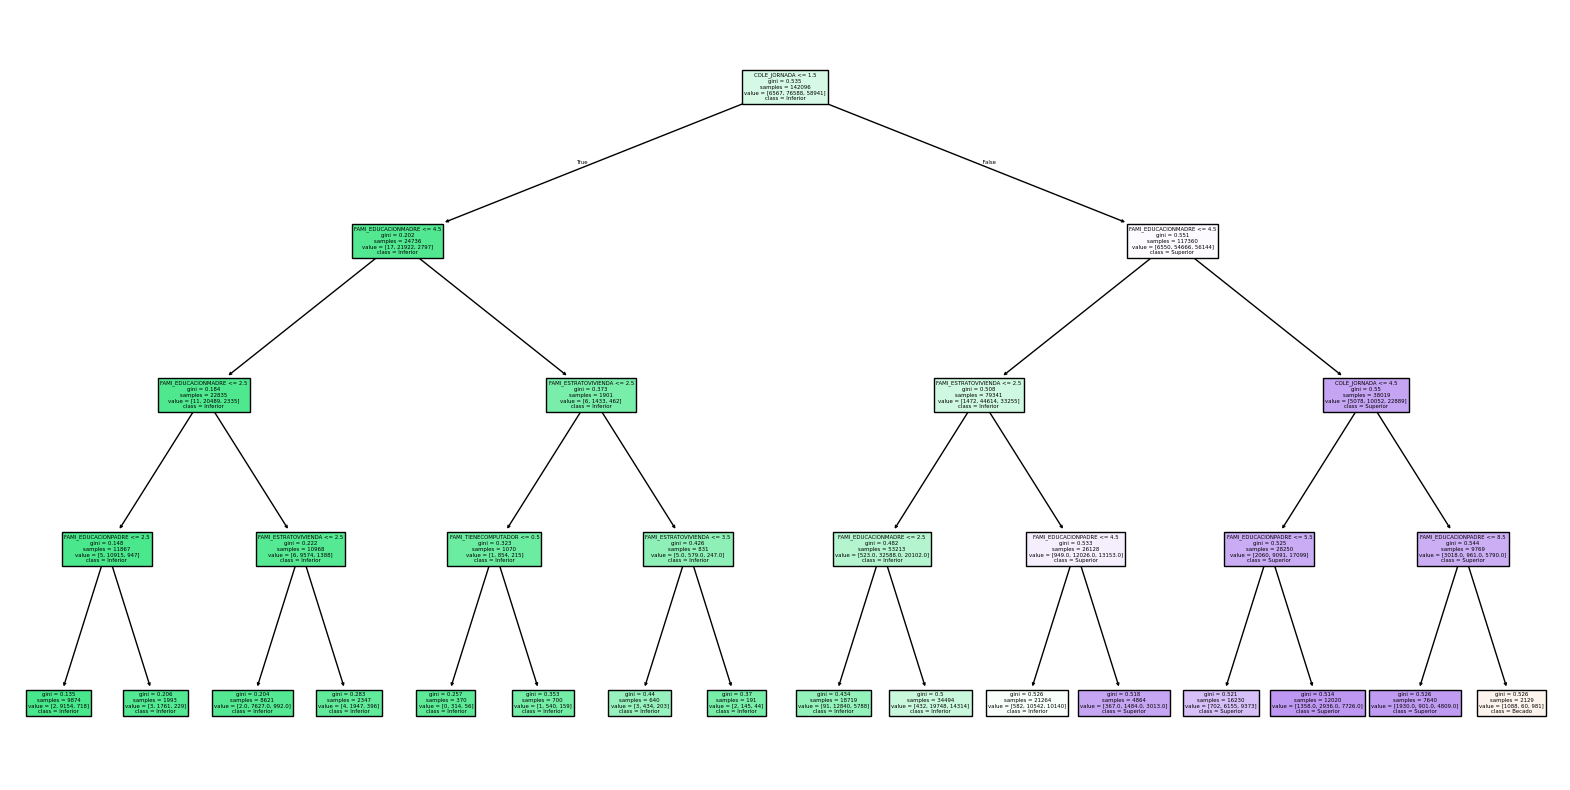

In [49]:
# ========================
# 1. Usar dataframe codificado
# ========================
df = df_codificado.copy()

# ========================
# 2. Variable target
# ========================
def categorizar_puntaje(puntaje):
    if puntaje < 256.1:
        return "Inferior"
    elif puntaje < 349:
        return "Superior"
    else:
        return "Becado"

df["RENDIMIENTO"] = df["PUNT_GLOBAL"].apply(categorizar_puntaje)

# ========================
# 3. Variables predictoras (solo las deseadas)
# ========================
columnas_features = [
    "COLE_JORNADA",
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENECOMPUTADOR"
]

X = df[columnas_features]
y = df["RENDIMIENTO"]

# ========================
# 4. División train/test
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================
# 5. Modelo
# ========================
modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo.fit(X_train, y_train)

# ========================
# 6. Evaluación
# ========================
y_pred = modelo.predict(X_test)

print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_,
            yticklabels=modelo.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión DT")
plt.show()

# ========================
# 7. Visualización del árbol
# ========================
plt.figure(figsize=(20,10))
tree.plot_tree(modelo,
               feature_names=X.columns,
               class_names=modelo.classes_,
               filled=True)
plt.show()

## **RANDOM FOREST**

Reporte de Clasificación:
              precision    recall  f1-score   support

      Becado       0.46      0.16      0.24      1561
    Inferior       0.68      0.79      0.73     19205
    Superior       0.59      0.51      0.55     14758

    accuracy                           0.65     35524
   macro avg       0.58      0.49      0.51     35524
weighted avg       0.63      0.65      0.63     35524



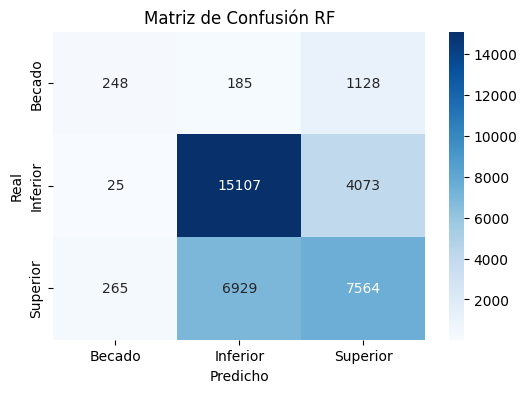

/tmp/ipython-input-56642942.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=importancias.index, palette="viridis")


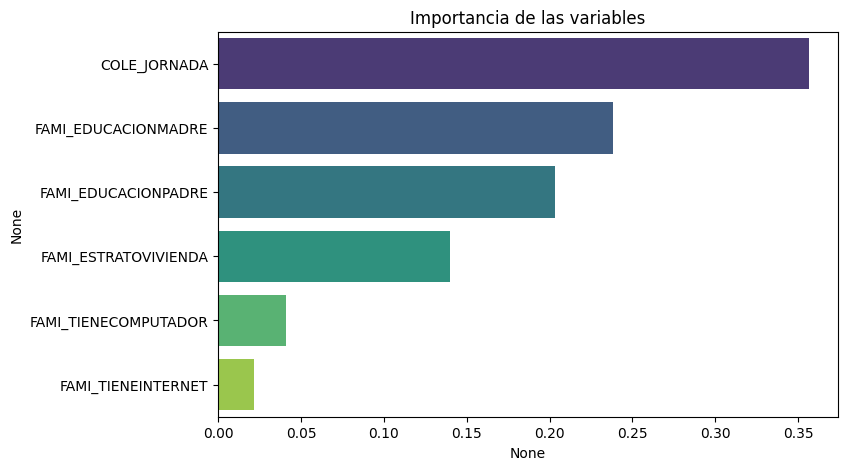

In [50]:
# ========================
# 1. Usar el dataframe ya codificado
# ========================
df = df_codificado.copy()

# ========================
# 2. Crear la variable target (clasificación del rendimiento)
# ========================
def categorizar_puntaje(puntaje):
    if puntaje < 256.1:
        return "Inferior"
    elif puntaje < 349:
        return "Superior"
    else:
        return "Becado"

df["RENDIMIENTO"] = df["PUNT_GLOBAL"].apply(categorizar_puntaje)

# ========================
# 3. Seleccionar variables predictoras (features específicas)
# ========================
columnas_features = [
    "COLE_JORNADA",
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENECOMPUTADOR"
]

X = df[columnas_features]
y = df["RENDIMIENTO"]

# ========================
# 4. Dividir datos en entrenamiento y prueba
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================
# 5. Entrenar modelo Random Forest
# ========================
modelo = RandomForestClassifier(random_state=42, n_estimators=100)
modelo.fit(X_train, y_train)

# ========================
# 6. Predicciones y evaluación
# ========================
y_pred = modelo.predict(X_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_,
            yticklabels=modelo.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión RF")
plt.show()

# ========================
# 7. Importancia de variables
# ========================
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=importancias, y=importancias.index, palette="viridis")
plt.title("Importancia de las variables")
plt.show()

## **MAQUINAS DE SOPORTE VECTORIAL**


--- [Paso 4] Datos divididos y escalados. 142096 para entrenar. ---
Exactitud (Accuracy): 0.6485

Matriz de Confusión:
[[  105   173  1283]
 [    4 15504  3697]
 [   87  7242  7429]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      Becado       0.54      0.07      0.12      1561
    Inferior       0.68      0.81      0.74     19205
    Superior       0.60      0.50      0.55     14758

    accuracy                           0.65     35524
   macro avg       0.60      0.46      0.47     35524
weighted avg       0.64      0.65      0.63     35524



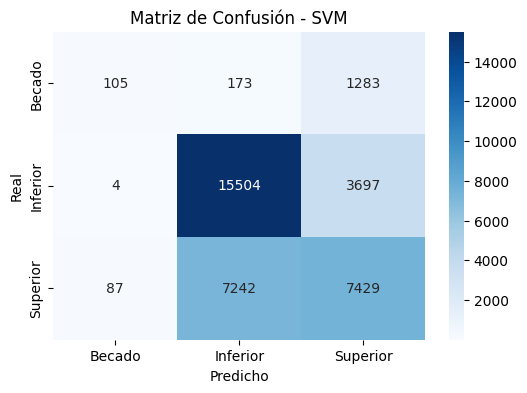

In [56]:
# ========================
# 1. Usar dataframe ya codificado
# ========================
df = df_codificado.copy()

# ========================
# 2. Crear la variable target (clasificación del rendimiento)
# ========================
def categorizar_puntaje(puntaje):
    if puntaje < 256.1:
        return "Inferior"
    elif puntaje < 349:
        return "Superior"
    else:
        return "Becado"


df["RENDIMIENTO"] = df["PUNT_GLOBAL"].apply(categorizar_puntaje)

# ========================
# 3. Seleccionar variables predictoras (features específicas)
# ========================
columnas_features = [
    "COLE_JORNADA",
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENECOMPUTADOR"
]

X = df[columnas_features]
y = df["RENDIMIENTO"]

# ========================
# 4. Dividir datos en entrenamiento y prueba
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado de características (muy importante para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n--- [Paso 4] Datos divididos y escalados. {len(X_train)} para entrenar. ---")

# ========================
# 5. Entrenar modelo SVM
# ========================
modelo = SVC(kernel="rbf", C=1.0, gamma='scale', random_state=42)
modelo.fit(X_train_scaled, y_train)

# ========================
# 6. Predicciones y evaluación
# ========================
y_pred = modelo.predict(X_test_scaled)

print("Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred), 4))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión (visual)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_,
            yticklabels=modelo.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.show()


# **CASO 2 COMPARACIÓN DE MODELOS EN 2 CATEGORÍAS**

## **ARBOL DE DECISION**

Reporte de clasificación:
               precision    recall  f1-score   support

      Becado       0.51      0.12      0.20      1561
   No Becado       0.96      0.99      0.98     33963

    accuracy                           0.96     35524
   macro avg       0.74      0.56      0.59     35524
weighted avg       0.94      0.96      0.94     35524



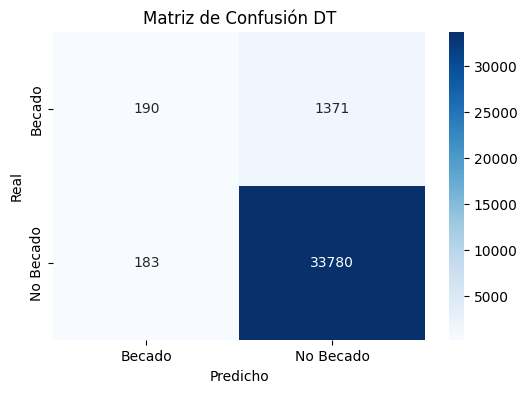

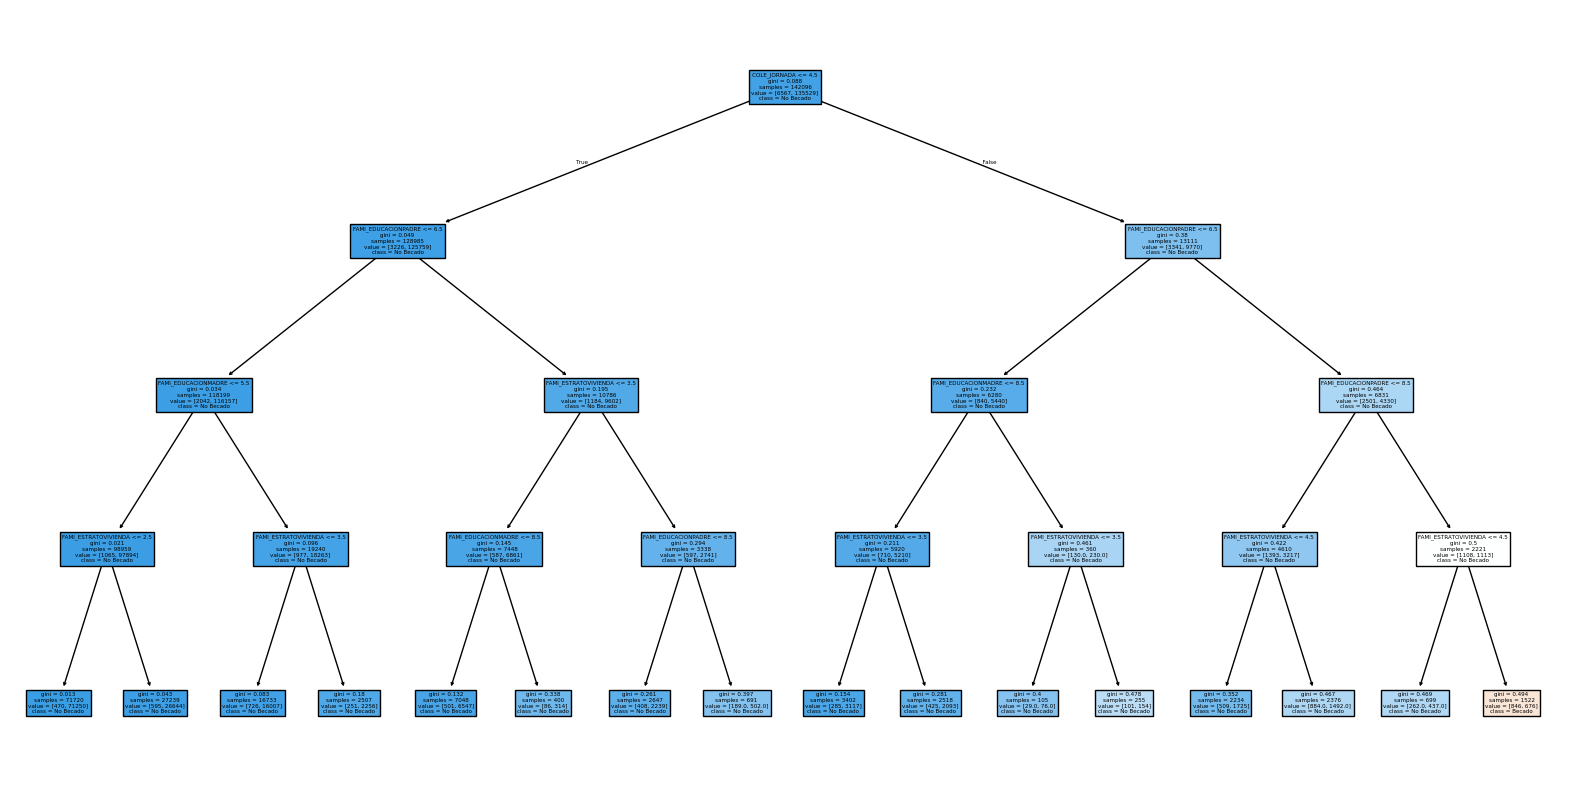

In [52]:
# ========================
# 1. Usar dataframe codificado
# ========================

df = df_codificado.copy()

# ========================
# 2. Crear la variable target (clasificación del rendimiento)
# ========================
def categorizar_puntaje(puntaje):
    if puntaje < 349:
        return "No Becado"
    else:
        return "Becado"

df["RENDIMIENTO"] = df["PUNT_GLOBAL"].apply(categorizar_puntaje)

# ========================
# 3. Variables predictoras (solo las deseadas)
# ========================
columnas_features = ["COLE_JORNADA",
                     "FAMI_EDUCACIONMADRE",
                     "FAMI_EDUCACIONPADRE",
                     "FAMI_ESTRATOVIVIENDA"]

X = df[columnas_features]
y = df["RENDIMIENTO"]

# ========================
# 4. División train/test
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================
# 5. Modelo
# ========================
modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo.fit(X_train, y_train)

# ========================
# 6. Evaluación
# ========================
y_pred = modelo.predict(X_test)

print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_,
            yticklabels=modelo.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión DT")
plt.show()

# ========================
# 7. Visualización del árbol
# ========================
plt.figure(figsize=(20,10))
tree.plot_tree(modelo,
               feature_names=X.columns,
               class_names=modelo.classes_,
               filled=True)
plt.show()

## **RANDOM FOREST**

Reporte de Clasificación:
              precision    recall  f1-score   support

      Becado       0.54      0.11      0.19      1561
   No Becado       0.96      1.00      0.98     33963

    accuracy                           0.96     35524
   macro avg       0.75      0.55      0.58     35524
weighted avg       0.94      0.96      0.94     35524



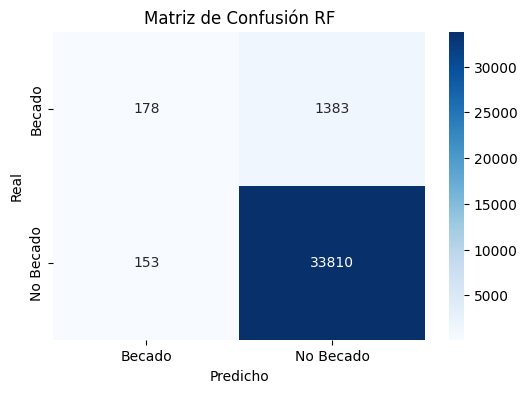

/tmp/ipython-input-557441546.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=importancias.index, palette="viridis")


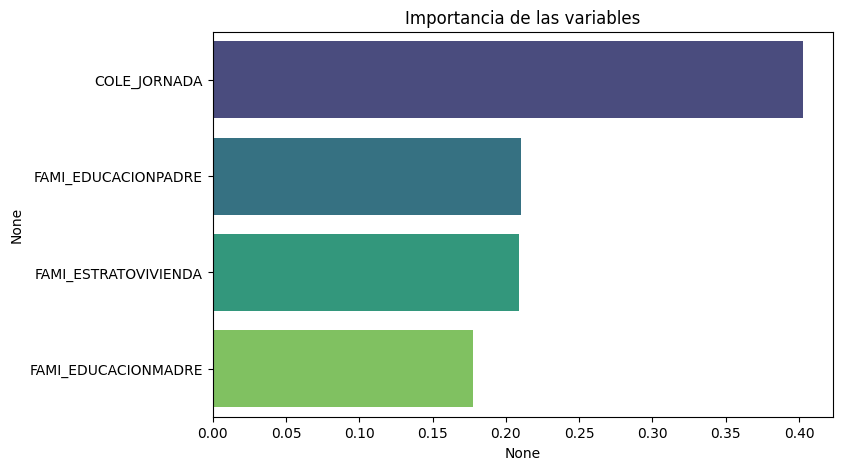

In [53]:
# ========================
# 1. Usar el dataframe ya codificado
# ========================
df = df_codificado.copy()

# ========================
# 2. Crear la variable target (clasificación del rendimiento)
# ========================
def categorizar_puntaje(puntaje):
    if puntaje < 349:
        return "No Becado"
    else:
        return "Becado"

df["RENDIMIENTO"] = df["PUNT_GLOBAL"].apply(categorizar_puntaje)

# ========================
# 3. Seleccionar variables predictoras (features)
# ========================

# ========================
# 3. Seleccionar variables predictoras (features específicas)
# ========================
columnas_features = ["COLE_JORNADA",
                     "FAMI_EDUCACIONMADRE" ,
                     "FAMI_EDUCACIONPADRE",
                     "FAMI_ESTRATOVIVIENDA"]

X = df[columnas_features]
y = df["RENDIMIENTO"]

# ========================
# 4. Dividir datos en entrenamiento y prueba
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================
# 5. Entrenar modelo Random Forest
# ========================
modelo = RandomForestClassifier(random_state=42,max_depth=4, n_estimators=100)
modelo.fit(X_train, y_train)

# ========================
# 6. Predicciones y evaluación
# ========================
y_pred = modelo.predict(X_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_,
            yticklabels=modelo.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión RF")
plt.show()

# ========================
# 7. Importancia de variables
# ========================
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=importancias, y=importancias.index, palette="viridis")
plt.title("Importancia de las variables")
plt.show()

## **MAQUINAS DE SOPORTE VECTORIAL**


--- [Paso 4] Datos divididos y escalados. 142096 para entrenar. ---
Exactitud (Accuracy): 0.9567

Matriz de Confusión:
[[  148  1413]
 [  126 33837]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      Becado       0.54      0.09      0.16      1561
   No Becado       0.96      1.00      0.98     33963

    accuracy                           0.96     35524
   macro avg       0.75      0.55      0.57     35524
weighted avg       0.94      0.96      0.94     35524



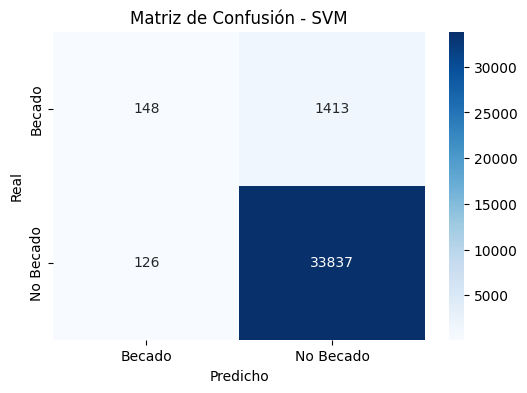

In [55]:
# ========================
# 1. Usar dataframe ya codificado
# ========================
df = df_codificado.copy()

# ========================
# 2. Crear la variable target (clasificación del rendimiento)
# ========================
def categorizar_puntaje(puntaje):
    if puntaje < 349:
        return "No Becado"
    else:
        return "Becado"

df["RENDIMIENTO"] = df["PUNT_GLOBAL"].apply(categorizar_puntaje)

# ========================
# 3. Seleccionar variables predictoras (features específicas)
# ========================
columnas_features = ["COLE_JORNADA",
                     "FAMI_EDUCACIONMADRE" ,
                     "FAMI_EDUCACIONPADRE",
                     "FAMI_ESTRATOVIVIENDA"]

X = df[columnas_features]
y = df["RENDIMIENTO"]

# ========================
# 4. Dividir datos en entrenamiento y prueba
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado de características (muy importante para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n--- [Paso 4] Datos divididos y escalados. {len(X_train)} para entrenar. ---")

# ========================
# 5. Entrenar modelo SVM
# ========================
modelo = SVC(kernel="rbf", C=1.0, gamma='scale', random_state=42)
modelo.fit(X_train_scaled, y_train)

# ========================
# 6. Predicciones y evaluación
# ========================
y_pred = modelo.predict(X_test_scaled)

print("Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred), 4))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión (visual)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_,
            yticklabels=modelo.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.show()